<!-- Google Fonts -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #fff; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 10px; 
        font-size: 36px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        💰 Job Salaries 💼
    </h1>
</div>


# Overview

**Background**

This dataset contains **job salary records for Data Science roles worldwide**, covering multiple years and diverse working arrangements.
It provides information on **job titles, experience levels, employment types, company sizes, locations, remote work ratios**, and most importantly, **standardized salaries (in USD)**.

Given the global demand for data professionals, this dataset is valuable for **analyzing salary trends**, **understanding factors that drive compensation**, and **supporting career or HR planning decisions**.

**Goal of the Project**

Build a machine learning model to:

* **Predict salary (USD)** based on job, experience, and company attributes
* Identify **key drivers of compensation** (experience, company size, remote ratio, etc.)
* Provide insights for **job seekers and employers** to make data-driven career and hiring decisions

**Key Features**

| Feature Name         | Description                                                          |
| -------------------- | -------------------------------------------------------------------- |
| `work_year`          | Year of observation                                                  |
| `experience_level`   | Level of experience (Entry, Junior, Senior, Executive)               |
| `employment_type`    | Type of employment (Full-time, Part-time, Contract, Freelance)       |
| `job_title`          | Role of the employee (e.g., Data Scientist, ML Engineer, Analyst)    |
| `salary`             | Salary amount in the original currency                               |
| `salary_currency`    | Currency of the reported salary                                      |
| `salary_in_usd`      | Salary standardized to USD (**target variable**)                     |
| `employee_residence` | Country of residence of the employee                                 |
| `remote_ratio`       | Degree of remote work (0 = on-site, 50 = hybrid, 100 = fully remote) |
| `company_location`   | Country where the company is based                                   |
| `company_size`       | Size of the company (S = small, M = medium, L = large)               |

**Files Provided**

* `ds_salaries.csv`: Main dataset containing job-related attributes and salary information.

**Project Objective**

The goal of this notebook is to **model and predict data science salaries**, helping to:

* Benchmark salaries across roles, levels, and geographies
* Explore the effect of remote work and company size on pay
* Support fair compensation strategies in the job market
* Provide insights for career planning and HR analytics

**Key Steps**

* **Exploratory Data Analysis (EDA):** <br>
  Study salary distribution by job title, location, company size, remote ratio, and experience level.

* **Feature Engineering:**
  Encode categorical variables, normalize salaries, and create derived features (e.g., region grouping).

* **Modeling:**
  Train and compare multiple models:

  * Linear Regression
  * Random Forest Regressor
  * XGBoost / LightGBM
  * Ensemble approaches

* **Evaluation Framework:**
  Use cross-validation and evaluate with:

  * R² (Coefficient of Determination)

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Import Libraries</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Import Libraries
    </h1>
</div>


In [85]:
# Core data manipulation libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import shap

# Statistical functions
from scipy.stats import skew

# Display utilities for Jupyter notebooks
from IPython.display import display

# Machine learning preprocessing and modeling
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder, RobustScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Statistical
from scipy.stats import chi2_contingency
from scipy.stats import shapiro, probplot
from scipy.stats import mannwhitneyu
from scipy.stats import levene
from scipy.stats import ttest_ind
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import kruskal
from scipy.stats import anderson
import scikit_posthocs as sp
from scipy.stats import normaltest

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", 500) # To display all the columns of dataframe
pd.set_option("max_colwidth", None) # To set the width of the column to maximum

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Load Data</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Load Data
    </h1>
</div>


In [86]:
# Load the datasets
df_salaries = pd.read_csv("/kaggle/input/data-science-job-salaries/ds_salaries.csv")

# Verify shapes
print("Data Shape:", df_salaries.shape)

Data Shape: (607, 12)


<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Preview and Info</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Data Preview and Info
    </h1>
</div>


In [87]:
# Display few rows of dataset
print("Data Preview:")
display(df_salaries.head())

Data Preview:


,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [88]:
# Display information about the DataFrames
print("Data Info:")
df_salaries.info()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


## Insights from Initial Data Exploration

**Dataset Size and Structure**  
   - The **dataset** contains **607** samples with **12** columns, including the target variable `salary_in_usd`.

**Feature Overview**  
   - Both datasets include all important attributes:
     - **Numerical features:** `salary`, `salary_in_usd`.
     - **Categorical features:** `experience_level`, `employment_type`, `job_title`, `salary_currency`, `employee_residence`, `company_location`, `work_year`, `remote_ratio` and `company_size`.
   - The target variable is **numerical** value.

**Data Completeness**  
   - The dataset have **no missing values**, we need to handle this issue.
   - Data types are appropriate: numerical features is int64 and categorical features is object.

In [89]:
df_salaries["remote_ratio"].value_counts()

remote_ratio
100    381
0      127
50      99
Name: count, dtype: int64

In [90]:
df_salaries.columns = (
    df_salaries.columns
    .str.strip()
)

df_salaries.drop(columns="Unnamed: 0", axis=1, inplace=True)

# Display few rows of dataset
print("Data Preview:")
display(df_salaries.head())

Data Preview:


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [91]:
num_features = ["salary", "salary_in_usd"]
cat_features = ["remote_ratio", "work_year", "experience_level", "employment_type", "job_title", "salary_currency", "employee_residence", "company_location", "company_size"]

print("Data describe:")
cm = sns.light_palette("blue", as_cmap=True)
display(df_salaries.drop(columns=cat_features, axis=1).describe().T.style.background_gradient(cmap=cm))

Data describe:


,count,mean,std,min,25%,50%,75%,max
salary,607.000000,324000.062603,1544357.486636,4000.000000,70000.000000,115000.000000,165000.000000,30400000.000000
salary_in_usd,607.000000,112297.869852,70957.259411,2859.000000,62726.000000,101570.000000,150000.000000,600000.000000


## Descriptive Insights – Numerical Features

`salary`

* Mean \~ **324,000**, but Std \~ **1,544,357** → extremely large variation.
* Min = **4,000**, Max = **3,040,000** → likely includes **outliers** (very high salaries in certain roles/currencies).
* Distribution is right-skewed.
* Less suitable as target; typically replaced by `salary_in_usd`.

`salary_in_usd` (target)

* Mean \~ **112,298 USD**, median \~ **101,570 USD**.
* Range: **2,859 USD → 600,000 USD**.
* Very wide salary spread, reflecting diverse roles, seniority levels, and countries.
* Still right-skewed, so a **log-transform** may help stabilize the distribution for modeling.

In [92]:
def convert_cat(df, cat_features= cat_features):
    for feature in cat_features:
        if feature in df.columns:
            df[feature] = df[feature].astype("category")
        else:
            pass

convert_cat(df=df_salaries)

In [93]:
print("Data describe:")
df_salaries.drop(columns=num_features, axis=1).describe().T

Data describe:


,count,unique,top,freq
work_year,607,3,2022,318
experience_level,607,4,SE,280
employment_type,607,4,FT,588
job_title,607,50,Data Scientist,143
salary_currency,607,17,USD,398
employee_residence,607,57,US,332
remote_ratio,607,3,100,381
company_location,607,50,US,355
company_size,607,3,M,326


## Descriptive Insights from Categorical Features

* **`work_year` (3 values: 2020–2022):** Mostly **2022** (318 records). → Data is concentrated in the most recent year.

* **`experience_level` (4 levels):** `SE` (Senior) is the largest group (280). → Dataset leans toward senior professionals.

* **`employment_type` (4 types):** `FT` (Full-time) dominates (588/607). → Very few part-time or freelance records.

* **`job_title` (50 unique):** Diverse, but **Data Scientist** is the most common (143). → A few popular roles, many rare ones.

* **`salary_currency` (17 types):** `USD` is the most frequent (398). → Despite multiple currencies, most salaries are easily standardized to USD.

* **`employee_residence` (57 countries):** `US` is the majority (332). → Dataset is skewed toward the U.S. market.

* **`remote_ratio` (3 levels: 0–50–100):** `100` (fully remote) dominates (381). → Strong trend toward remote work.

* **`company_location` (50 countries):** `US` is the most frequent (355). → Consistent with employee residence → many companies are U.S.-based.

* **`company_size` (3 levels: S–M–L):** `M` (Medium) is the most common (326). → Mid-sized companies are the most represented group.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Quality Checks</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Data Quality Checks
    </h1>
</div>


## Missing Value

In [94]:
def displayNULL(df, dataset_name = None, style = 1):
    if style == 1 and dataset_name is None:
        for column in df.columns:
            if df[column].isna().sum() > 0:
                print(f"Column: {column}: {df[column].isnull().sum()}")
            else:
                pass
    else:
        missing_count = df.isnull().sum().sum()
        rows = len(df)
        
        print("=" * 40)
        print(f"{dataset_name} Missing Value Analysis")
        print("=" * 40)
        
        if missing_count == 0:
            print(f"✅ No missing values detected in {rows:,} rows")
        else:
            print(f"⚠️  {missing_count} missing values found in {rows:,} rows")

displayNULL(df=df_salaries, dataset_name="Data", style=2)

Data Missing Value Analysis
✅ No missing values detected in 607 rows


## Checking duplicate Value

In [95]:
def check_duplicates_report(df, dataset_name):
    duplicates_count = df.duplicated().sum()
    total_rows = len(df)
    
    print("=" * 40)
    print(f"🔍 {dataset_name} Duplicate Analysis")
    print("=" * 40)
    
    if duplicates_count == 0:
        print(f"✅ No duplicates found in {total_rows:,} rows")
    else:
        print(f"⚠️  {duplicates_count} duplicates found ({duplicates_count/total_rows:.2%})")
        print(f"    Total rows affected: {duplicates_count:,}/{total_rows:,}")

duplicate_summary = {}
check_duplicates_report(df=df_salaries, dataset_name="Data")
duplicate_summary["Data"] = {
    "duplicates": df_salaries.duplicated().sum(),
    "total_rows": len(df_salaries)
}

🔍 Data Duplicate Analysis
⚠️  42 duplicates found (6.92%)
    Total rows affected: 42/607


## Checking Outlier Value

In [96]:
def checking_outlier(list_feature, df, dataset_name):
    print("=" * 40)
    print(f"🔍 {dataset_name} Checking outlier")
    print("=" * 40)
    outlier_info = []
    for feature in list_feature:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]
        if len(outliers) == 0:
            pass
        else:
            outlier_info.append({
            "Feature": feature,
            "Outlier Count": len(outliers),
            # "Outlier Detail": outliers.tolist()
            })
    return pd.DataFrame(outlier_info)


checking_outlier(list_feature=num_features, df=df_salaries, dataset_name="Data")

🔍 Data Checking outlier


,Feature,Outlier Count
0,salary,44
1,salary_in_usd,10


## Data Quality Insights: Missing Values, Duplicates and Outliers

**Missing Values Analysis**

- We conducted a thorough check for missing values across the datasets.  
- **No missing values** in the datasets.

**Duplicate Records Analysis**

* **Finding:** 42 duplicates (6.92%) detected — same information details but different IDs.
* **Interpretation:** This likely reflects **real-world behavior**.

**Key Insight:** Duplicates with different IDs are not necessarily data errors.

**Outliers Records Analysis**

- We also examined the datasets for checking outliers.
- **The outliers** were found in dataset at features. But we can not remove them since these outliers reflect reality.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Exploratory Data Analysis</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Exploratory Data Analysis
    </h1>
</div>


**Statistical**

✅ Are the Assumptions of T-Test and ANOVA the Same?
Yes — T-Test and ANOVA share very similar assumptions, as both are parametric tests used to compare group means. However, there are slight differences due to their intended use.

✅ Common Assumptions for Both T-Test and ANOVA

| **Assumption**                 | **T-Test**                                        | **ANOVA**                             |
| ------------------------------ | ------------------------------------------------- | ------------------------------------- |
| **1. Dependent variable**      | Continuous                                        | Continuous                            |
| **2. Grouping variable**       | Categorical with **2 groups**                     | Categorical with **3 or more groups** |
| **3. Normality**               | Data in each group should be normally distributed | Same as T-Test                        |
| **4. Homogeneity of variance** | Equal variances across groups (`equal_var=True`)  | Same as T-Test                        |
| **5. Independence**            | Observations must be independent                  | Same as T-Test                        |

🔄 Key Differences Between T-Test and ANOVA

| **Criterion**           | **T-Test**                   | **ANOVA**                                       |
| ----------------------- | ---------------------------- | ----------------------------------------------- |
| Number of groups        | Compares **2 groups**        | Compares **3 or more groups**                   |
| Post-hoc tests required | Not required                 | Required if significant (e.g., **Tukey’s HSD**) |
| Types of tests          | Independent or Paired T-Test | One-Way or Repeated Measures ANOVA              |

📌 Alternatives When Assumptions Are Violated

| **Violation**           | **T-Test Alternative**  | **ANOVA Alternative**   |
| ----------------------- | ----------------------- | ----------------------- |
| Non-normal distribution | **Mann–Whitney U Test** | **Kruskal–Wallis Test** |
| Unequal variances       | **Welch’s T-Test**      | **Welch’s ANOVA**       |

In [97]:
def color(n_colors=2):
    cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
    positions = np.linspace(0, 1, n_colors)
    colors = [cmap(p) for p in positions]
    return colors

In [98]:
def cal_ChiSquare(cat_feature, target_feature, df, show_expected=False, show_residuals=False):
    """
    Perform a Chi-Square test of independence to evaluate whether two categorical variables 
    are statistically associated (i.e., dependent) or independent from each other.

    This function tests the null hypothesis that the two categorical variables are independent.
    It prints the test statistic, degrees of freedom, p-value, and an interpretation based on the p-value.
    Optionally, it displays the expected frequency table under independence, and standardized residuals 
    (including a heatmap) which help to identify specific group-level deviations.

    Parameters
    ----------
    cat_feature : str
        Name of the first categorical variable (typically the feature).
    
    target_feature : str
        Name of the second categorical variable (typically the target label).
    
    df : pd.DataFrame
        The input DataFrame containing the data.
    
    show_expected : bool, default=False
        If True, prints the expected frequencies under the assumption of independence.
    
    show_residuals : bool, default=False
        If True, prints the standardized residuals and shows them as a heatmap 
        to identify where the strongest associations/deviations occur.

    Returns
    -------
    None
        Prints the Chi-Square test result, including statistical significance interpretation.
        Optionally prints expected values and standardized residuals.

    Notes
    -----
    - Hypotheses:
        H₀ (Null):     The two variables are independent (no association).
        H₁ (Alt.):      There is a dependency or association between the variables.
    
    - Interpretation:
        If p-value < 0.05 → Reject H₀ → Conclude that the variables are significantly associated.
        If p-value ≥ 0.05 → Fail to reject H₀ → No statistically significant association found.

    - Standardized residuals:
        - Values > +2 or < -2 indicate strong deviation from expected frequency (local dependency).
        - Useful for identifying specific group-level contributions to the overall Chi-Square result.

    References
    ----------
    - https://en.wikipedia.org/wiki/Chi-squared_test
    - https://www.scribbr.com/statistics/chi-square-test-of-independence/
    """
    print(f"\n🔍 Chi-Square Test of Independence: '{cat_feature}' vs. '{target_feature}'")

    # Contingency table
    crosstab = pd.crosstab(df[cat_feature], df[target_feature])
    chi2, p, dof, expected = chi2_contingency(crosstab)

    print(f"Chi-squared statistic: {chi2:.3f}")
    print(f"Degrees of freedom: {dof}")
    print(f"p-value: {p:.6f}")

    if p < 0.05:
        print("✅ Result: p-value < 0.05 → Reject H₀")
        print(f"→ There is a **statistically significant association** between '{cat_feature}' and '{target_feature}'.")
    else:
        print("❎ Result: p-value ≥ 0.05 → Fail to reject H₀")
        print(f"→ No statistically significant association between '{cat_feature}' and '{target_feature}'.")

    # Optional: show expected frequencies
    if show_expected:
        print("\n📊 Expected Frequencies:")
        print(pd.DataFrame(expected, index=crosstab.index, columns=crosstab.columns))
    else:
        pass

    # Optional: show standardized residuals
    if show_residuals:
        cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
        residuals = (crosstab - expected) / np.sqrt(expected)
        print("\nStandardized Residuals:")
        print(round(residuals, 2))

        # Heatmap of residuals
        plt.figure(figsize=(6, 4))
        sns.heatmap(residuals, annot=True, cmap=cmap, center=0, fmt=".2f", linewidths=0.5)
        plt.title(f"Standardized Residuals Heatmap: {cat_feature} vs {target_feature}")
        plt.ylabel(cat_feature)
        plt.xlabel(target_feature)
        plt.tight_layout()
        plt.show()
    else:
        pass

def cal_shapiro(cat_feature, num_feature, df, plot_result=False):
    """
    Perform the Shapiro–Wilk test to assess normality of a numerical feature 
    within each group defined by a categorical feature.

    This function iterates through all unique, non-null values of a categorical variable,
    and applies the Shapiro–Wilk test to the corresponding subgroup of the numeric variable.
    Optionally, it displays a Q-Q plot to visually assess the distribution.

    Parameters
    ----------
    cat_feature : str
        The name of the categorical column that defines the groups.

    num_feature : str
        The name of the numerical column to test for normality.

    df : pd.DataFrame
        The input DataFrame containing the data.

    plot_result : bool, optional (default=False)
        If True, displays a Q-Q plot for each group to visually assess normality.

    Returns
    -------
    None
        Prints the Shapiro–Wilk test statistic and p-value for each group,
        and optionally shows a Q-Q plot.

    Notes
    -----
    - H₀ (null hypothesis): The data is normally distributed.
    - H₁ (alternative): The data is not normally distributed.
    - If p > 0.05 → fail to reject H₀ → data appears normal.
    - If p ≤ 0.05 → reject H₀ → data likely not normal.
    - The test is not reliable for n > 5000 (as per scipy recommendation).
    - Requires at least 3 non-null values per group.

    References
    ----------
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html
    - https://www.statskingdom.com/shapiro-wilk-test.html
    """

    print(f"🔎 Shapiro-Wilk Normality Test for {num_feature} across {cat_feature} groups")

    for group in df[cat_feature].dropna().unique():
        data = df[df[cat_feature] == group][num_feature].dropna()
        n = len(data)

        if n < 3:
            print(f"⚠️ Group {group} has too few values ({n}) to perform Shapiro-Wilk test.")
        elif n > 5000:
            print(f"⚠️ Group {group} has {n} samples. Shapiro-Wilk may not be reliable for n > 5000.")
        else:
            stat, p = shapiro(data)
            print(f"Group: {group}")
            print(f"  Shapiro-Wilk statistic: {stat:.3f}")
            print(f"  p-value: {p}")
            if p > 0.05:
                print(f" 🟢 Group '{group}' appears to follow a normal distribution.\n")
            else:
                print(f" ⚪ Group '{group}' does not appear to follow a normal distribution.\n")

            if plot_result:
                probplot(data, dist="norm", plot=plt)
                plt.title(f"QQ Plot - {group}")
                plt.show()
            else:
                pass

def cal_levene(dataframe, categorical_feature, num_feature, center="mean"):
    """
    Perform Levene’s test to assess the equality (homogeneity) of variances 
    for a numeric feature across two or more groups defined by a categorical feature.

    Levene's test is used to verify the assumption of equal variances 
    (homoscedasticity), which is important for parametric tests such as the 
    independent t-test and ANOVA.

    Parameters
    ----------
    dataframe : pd.DataFrame
        The input DataFrame containing the features to test.

    categorical_feature : str
        The name of the categorical column that defines the grouping.

    num_feature : str
        The name of the numerical column whose variance is being compared across groups.

    center : str, optional (default="mean")
        Specifies the measure of central tendency to use when calculating deviations:
        - "mean": classic Levene's test (sensitive to non-normal data)
        - "median": more robust to non-normal distributions (Brown–Forsythe test)

    Returns
    -------
    None
        Prints the Levene test statistic, p-value, and an interpretation of whether 
        the variances are equal or significantly different.

    Notes
    -----
    - H₀ (Null Hypothesis): All groups have equal variances.
    - H₁ (Alternative Hypothesis): At least one group has different variance.
    - If p > 0.05 → Fail to reject H₀ → Variances are approximately equal.
    - If p ≤ 0.05 → Reject H₀ → Variances are significantly different (heteroscedasticity).

    References
    ----------
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html
    - https://www.geeksforgeeks.org/levenes-test-in-python/
    """

    print(f"🔍 Levene’s test: {num_feature} ~ {categorical_feature}")
    # Extract unique group labels
    groups = dataframe[categorical_feature].unique()    
    # Create a list of values for each group
    data_groups = [dataframe[dataframe[categorical_feature] == g][num_feature] for g in groups]    
    # Perform Levene’s test
    stat, p = levene(*data_groups, center=center)
    
    print(f"Levene statistic: {stat:.3f}")
    print(f"p-value: {p}")
    if p > 0.05:
        print("🟢 Variances are approximately equal across groups.")
    else:
        print("⚪ Variances are significantly different across groups.")

def cal_mannwhitneyu(dataframe, categorical_feature, num_feature):
    """
    Perform the Mann–Whitney U test (Wilcoxon rank-sum test) to assess whether there 
    is a statistically significant difference in the distribution of a numerical feature 
    between two independent groups defined by a binary categorical feature.

    The function also compares medians, calculates the effect size (r), provides interpretation,

    Parameters
    ----------
    dataframe : pd.DataFrame
        The input DataFrame containing the data.

    categorical_feature : str
        Column name of the categorical feature (must contain exactly 2 unique values).

    num_feature : str
        Column name of the numerical feature to compare.

    Returns
    -------
    None
        Prints the U statistic, p-value, medians, Z-score, effect size r, and interpretation.

    Notes
    -----
    - H₀ (Null Hypothesis): The two groups have the same distribution.
    - H₁ (Alternative Hypothesis): The distributions are different.
    - If p ≤ 0.05 → reject H₀ → significant difference.
    - Effect size r helps interpret how strong the difference is:
        * Small ~0.1, Medium ~0.3, Large ≥0.5
    """

    groups = dataframe[categorical_feature].dropna().unique()

    if len(groups) != 2:
        print(f"❌ Error: Mann-Whitney U test requires exactly 2 groups, but found {len(groups)}.")
        return

    print(f"🔍 Mann–Whitney U Test for '{num_feature}' by '{categorical_feature}'\n")
    print("H₀: The distributions of the two groups are equal.")
    print("H₁: The distributions are different.\n")

    group1 = dataframe[dataframe[categorical_feature] == groups[0]][num_feature].dropna()
    group2 = dataframe[dataframe[categorical_feature] == groups[1]][num_feature].dropna()

    stat, p = mannwhitneyu(group1, group2, alternative="two-sided")

    print(f"U statistic : {stat}")
    print(f"p-value     : {p}")

    # Interpretation
    if p <= 0.05:
        print("\n✅ Result: Statistically significant difference between the two groups (Reject H₀).")
        median1 = group1.median()
        median2 = group2.median()
        if median1 > median2:
            print(f" Interpretation: Group '{groups[0]}' has a higher median '{num_feature}' than Group '{groups[1]}'.")
        elif median1 < median2:
            print(f" Interpretation: Group '{groups[1]}' has a higher median '{num_feature}' than Group '{groups[0]}'.")
        else:
            print(" Interpretation: The medians are equal, but distributions may still differ.")
    else:
        print("\n⚪ Result: No statistically significant difference between the two groups (Fail to reject H₀).")


def t_test_with_cohens_d(data, categorical_feature, num_feature, equal_var = False):
    """
    Perform an Independent Two-Sample T-Test and compute Cohen's d to evaluate 
    the difference between two independent groups on a numeric variable.

    This function tests whether the means of two independent groups are statistically different,
    and also calculates the magnitude of the difference (effect size) using Cohen's d.

    Parameters
    ----------
    data : pd.DataFrame
        The input DataFrame containing the categorical and numerical features.

    categorical_feature : str
        The name of the categorical column used to define the two groups (must have exactly 2 unique values).

    num_feature : str
        The name of the numerical feature to compare between the two groups.

    equal_var : bool, optional (default=False)
        Assumes equal population variance if True (Student’s t-test). If False (default), performs Welch’s t-test.

    Returns
    -------
    None
        Prints the t-statistic, p-value, Cohen’s d, and interpretation of the effect size.

    Notes
    -----
    - H₀ (null hypothesis): The two groups have equal means.
    - H₁ (alternative): The means are significantly different.
    - Cohen's d interpretation:
        - 0.2  → small effect
        - 0.5  → medium effect
        - 0.8+ → large effect
    - Welch’s t-test is recommended when group variances are unequal (default setting).

    References
    ----------
    - https://www.scribbr.com/statistics/t-test/
    - https://en.wikipedia.org/wiki/Cohen%27s_d
    """

    # Extract unique groups
    groups = data[categorical_feature].dropna().unique()

    if len(groups) > 2:
        print(f"❌ Error: Independent T-Test requires 2 groups.")
        return
    else:
        print(f"🔍 Independent T-Test: {num_feature} ~ {categorical_feature}")
        # Extract values
        x1 = data[data[categorical_feature] == groups[0]][num_feature].dropna()
        x2 = data[data[categorical_feature] == groups[1]][num_feature].dropna()

        # T-test (independent)
        t_stat, p_value = ttest_ind(x1, x2, equal_var=equal_var)  # Welch’s t-test if variances may differ

        # Calculate Cohen’s d
        nx1, nx2 = len(x1), len(x2)
        pooled_std = np.sqrt(((nx1 - 1)*np.var(x1, ddof=1) + (nx2 - 1)*np.var(x2, ddof=1)) / (nx1 + nx2 - 2))
        cohens_d = (np.mean(x1) - np.mean(x2)) / pooled_std

        # Output
        print(f"\n🔍 T-Test between group'{groups[0]}' and group '{groups[1]}':")
        print(f"t-statistic: {t_stat:.3f}")
        print(f"p-value: {p_value:.6f}")

        if p_value < 0.05:
            print("\n✅ Significant difference found (p < 0.05)")
            print(f"\n📏 Cohen's d: {cohens_d:.3f}")            
            # Interpretation of Cohen's d
            if abs(cohens_d) < 0.2:
                size = "small"
            elif abs(cohens_d) < 0.5:
                size = "medium"
            else:
                size = "large"
            print(f"🧠 Effect size interpretation: {size} effect")
        else:
            print("\nℹ️ No significant difference found (p >= 0.05)")

def perform_anova_with_tukey(df, numeric_feature, categorical_feature, typ=2):
    """
    Perform a One-Way ANOVA test to determine whether there are statistically 
    significant differences between the means of three or more independent groups. 

    If the ANOVA test is significant (p < 0.05), Tukey's HSD post-hoc test is performed
    to identify which specific pairs of groups differ from each other.

    Parameters
    ----------
    df : pd.DataFrame
        The input dataset containing the numeric and categorical features.

    numeric_feature : str
        The name of the numerical (continuous) response variable.

    categorical_feature : str
        The name of the categorical (independent) variable used to group the data.

    typ : int, optional (default=2)
        The type of sum of squares to use in the ANOVA test:
        - Type I (1): Sequential.
        - Type II (2): Default and commonly used for balanced designs.
        - Type III (3): Use when model includes interaction terms or unbalanced data.

    Returns
    -------
    None
        Prints the ANOVA table, p-value, interpretation, and (if significant) the Tukey HSD test summary.

    Notes
    -----
    - H₀ (null hypothesis): All group means are equal.
    - H₁ (alternative hypothesis): At least one group mean is different.
    - If p < 0.05 → reject H₀ → perform Tukey’s HSD to find which groups differ.
    - Assumptions:
        1. Independence of observations
        2. Normally distributed groups (Shapiro or Anderson test can check this)
        3. Homogeneity of variances (Levene's test)

    References
    ----------
    - https://www.scribbr.com/statistics/one-way-anova/
    - https://en.wikipedia.org/wiki/Analysis_of_variance
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.tukey_hsd.html
    """

    # Extract unique groups
    groups = df[categorical_feature].dropna().unique()
    
    if len(groups) < 3:
        print(f"❌ Error: ANOVA requires 3 or more groups.")
        return
    else:
        print(f"\n🔍 ANOVA Test: {numeric_feature} ~ {categorical_feature} (Type {typ})")

        # Fit OLS model
        model = ols(f"{numeric_feature} ~ C({categorical_feature})", data=df).fit()

        # Perform ANOVA
        anova_table = anova_lm(model, typ=typ)
        print("\n📊 ANOVA Table:")
        print(anova_table)

        # Extract p-value
        p_value = anova_table["PR(>F)"].iloc[0]

        if p_value < 0.05:
            print("\n✅ Significant difference found (p < 0.05)")
            print("➡️ Performing Tukey's HSD post-hoc test:")

            tukey = pairwise_tukeyhsd(df[numeric_feature], df[categorical_feature])
            print(tukey.summary())
        else:
            print("\nℹ️ No significant difference found (p >= 0.05)")

def perform_kruskal_test(df, categorical_feature, numeric_feature):
    """
    Perform the Kruskal-Wallis H-test to determine whether there are statistically 
    significant differences in the distribution of a numeric variable across 
    three or more independent groups.

    If the result is significant (p < 0.05), Dunn's post-hoc test with Bonferroni correction 
    is performed to identify which group pairs differ.

    Parameters
    ----------
    df : pd.DataFrame
        The input dataset containing the categorical and numerical variables.

    categorical_feature : str
        The name of the categorical feature that defines the groups.

    numeric_feature : str
        The name of the numeric feature to be compared across groups.

    Returns
    -------
    None
        Prints the Kruskal-Wallis H-statistic, p-value, interpretation, and 
        optionally the results of Dunn's post-hoc test.

    Notes
    -----
    - H₀ (null hypothesis): The distribution of the numeric variable is the same across all groups.
    - H₁ (alternative hypothesis): At least one group has a different distribution.
    - If p < 0.05 → reject H₀ → use Dunn’s test to explore specific group differences.
    - Kruskal-Wallis is a non-parametric alternative to one-way ANOVA.
    - It does not assume normality, but assumes:
        1. Independent samples
        2. Ordinal or continuous response variable
        3. Similar shapes of distributions

    Requirements
    ------------
    - `scipy.stats.kruskal`
    - `scikit-posthocs` package for Dunn’s test (`import scikit_posthocs as sp`)

    References
    ----------
    - https://www.geeksforgeeks.org/kruskal-wallis-test/
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html
    - https://scikit-posthocs.readthedocs.io/en/latest/index.html
    """

    # Extract values
    groups = df[categorical_feature].dropna().unique()
    if len(groups) < 3:
        print(f"❌ Error: Kruskal-Wallis H-test requires 3 or more groups.")
        return
    else:
        print(f"\n🔍 Kruskal-Wallis Test: {numeric_feature} ~ {categorical_feature}")
        data_groups = [df[df[categorical_feature] == g][numeric_feature].dropna() for g in groups]

        # Perform kruskal
        stat, p = kruskal(*data_groups)

        print(f"Kruskal-Wallis H-statistic: {stat:.3f}")
        print(f"p-value: {p}")
        
        if p < 0.05:
            print("🟢 Significant difference found. Running Dunn's Post-Hoc Test...")
            dunn_result = sp.posthoc_dunn(df, val_col=numeric_feature, group_col=categorical_feature, p_adjust="bonferroni")
            print(dunn_result)
        else:
            print("\nℹ️ No significant difference found (p >= 0.05)")

def cal_Anderson(df, numerical_col, group_col):
    """
    Perform the Anderson–Darling test to assess whether the data within each group 
    follows a normal distribution.

    This function applies the Anderson-Darling normality test for each subgroup 
    defined by a categorical column, and optionally plots KDE distributions.

    Parameters
    ----------
    df : pd.DataFrame
        The input dataset.

    numerical_col : str
        The name of the numeric column to test for normality.

    group_col : str
        The name of the categorical column defining the groups to be tested separately.

    Returns
    -------
    None
        Prints the Anderson–Darling test statistic, critical values, and interpretation
        for each group. Optionally displays a KDE plot for visual comparison.

    Notes
    -----
    - H₀ (null hypothesis): The data follows a normal distribution.
    - If test statistic > critical value → ❌ Reject H₀ → Data is not normally distributed.
    - If test statistic ≤ critical value → ✅ Fail to reject H₀ → Data may be normal.
    - The test is more sensitive to deviations in the tails of the distribution than other tests like Shapiro-Wilk.

    Limitations
    ----------
    - Not recommended for very small sample sizes (< 8).
    - Not reliable for very large sample sizes where even small deviations may be flagged.

    References
    ----------
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html
    - https://www.itl.nist.gov/div898/handbook/eda/section3/eda35e.htm
    - https://en.wikipedia.org/wiki/Anderson–Darling_test
    """

    groups = df[group_col].dropna().unique()
    
    print(f"📊 Checking normality of '{numerical_col}' across groups of '{group_col}' using Anderson-Darling Test:\n")
    print("ℹ️  H₀: The data follows a normal distribution.")
    print("ℹ️  If test statistic > critical value → ❌ Reject H₀ → Not normally distributed.\n")

    for group in groups:
        data = df[df[group_col] == group][numerical_col].dropna()
        result = anderson(data, dist="norm")
        
        print(f"Group = {group}")
        print(f"  - Sample size: {len(data)}")
        print(f"  - Test statistic: {result.statistic:.4f}")
        
        for sl, cv in zip(result.significance_level, result.critical_values):
            verdict = "❌ Reject H₀ → Not normal" if result.statistic > cv else "✅ Fail to reject H₀ → Possibly normal"
            print(f"    - α = {sl}% | CV = {cv:.4f} → {verdict}")
        print()


def cal_normaltest(cat_feature, num_feature, df):
    """
    Perform D’Agostino and Pearson’s normality test on a numerical feature 
    across groups defined by a categorical feature.

    Parameters
    ----------
    cat_feature : str
        The name of the categorical column that defines the groups.

    num_feature : str
        The name of the numerical column to test for normality.

    df : pd.DataFrame
        The input DataFrame containing the data.

    Returns
    -------
    None
        Prints the test statistic and p-value for each group.

    Notes
    -----
    - H₀ (null hypothesis): The data is normally distributed.
    - H₁ (alternative): The data is not normally distributed.
    - If p > 0.05 → fail to reject H₀ → data appears normal.
    - If p ≤ 0.05 → reject H₀ → data likely not normal.
    - Recommended for n ≥ 20, especially reliable for n > 50.
    - Requires at least 8 non-null values per group (as per scipy recommendation).
    """
    
    print(f"🔎 D’Agostino and Pearson Normality Test for '{num_feature}' across '{cat_feature}' groups\n")

    for group in df[cat_feature].dropna().unique():
        data = df[df[cat_feature] == group][num_feature].dropna()
        n = len(data)

        print(f" Group: {group} (n = {n})")
        
        if n < 8:
            print(f"⚠️ Too few observations (< 8) to perform the test.\n")
            continue

        stat, p = normaltest(data)

        print(f"  Statistic : {stat:.3f}")
        print(f"  p-value   : {p:.5f}")
        
        if p > 0.05:
            print(f"  🟢 Interpretation: Data appears to follow a normal distribution.\n")
        else:
            print(f"  🔴 Interpretation: Data does not appear to follow a normal distribution.\n")

##  Salary in Usd Distribution

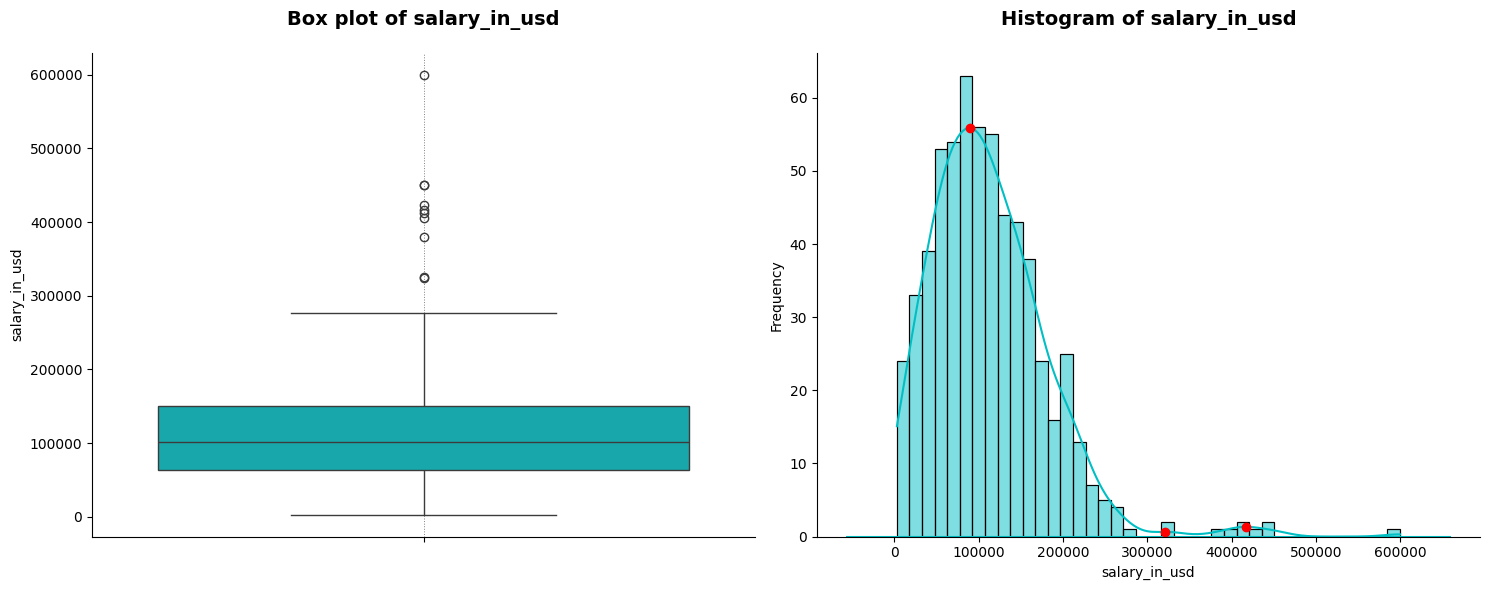

In [99]:
from scipy.signal import find_peaks
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(15, 6))

sns.boxplot(data=df_salaries, y = "salary_in_usd", ax=ax[0], color="#00BFC4")
ax[0].set_title(f"Box plot of salary_in_usd", fontsize=14, pad=20, weight="bold")
ax[0].grid(axis="x", color="gray", linestyle=":", linewidth=0.7)
ax[0].set_ylabel("salary_in_usd")
sns.despine(ax=ax[0], top=True, right=True, left=False, bottom=False)

sns.histplot(data=df_salaries, x = "salary_in_usd", ax=ax[1], color="#00BFC4", kde=True, bins=40)
ax[1].set_title(f"Histogram of salary_in_usd", fontsize=14, pad=20, weight="bold")
ax[1].set_xlabel("salary_in_usd")
ax[1].set_ylabel("Frequency")
# ax[1].grid(axis="x", color="gray", linestyle=":", linewidth=0.7)
sns.despine(ax=ax[1], top=True, right=True, left=False, bottom=False)

# Extract KDE values to find peaks
kde = sns.kdeplot(df_salaries["salary_in_usd"], ax=ax[1], color="#00BFC4").lines[0].get_data()
kde_x, kde_y = kde[0], kde[1]
peaks, _ = find_peaks(kde_y)

# Highlight peaks
for peak_idx in peaks:
    plt.plot(kde_x[peak_idx], kde_y[peak_idx], "ro")  # Red dots on peaks

plt.tight_layout()
plt.show()

**General Analysis of the Distribution of `salary_in_usd`**

**Box Plot:**

* The salary distribution shows a **wide interquartile range (IQR)**, reflecting strong variability in typical compensation.
* The **median salary** is around **100K USD**, while the upper quartile extends beyond **150K USD**.
* A number of **very high outliers** are present, with values exceeding **400K–600K USD**.
* This suggests the dataset includes **executive-level or specialized roles** that receive exceptionally high pay.
* The box plot reveals a **right-skewed pattern**, with the majority of salaries clustered in the lower-to-mid range.

**Histogram:**

* The histogram confirms a **right-skewed distribution**, with most salaries concentrated between **60K–150K USD**.
* A clear **peak occurs around 100K USD**, indicating this is the most common compensation range.
* Beyond \~200K USD, the frequency drops sharply, but a **long tail** persists up to \~600K USD.
* The highlighted red points indicate **isolated high-salary cases**, likely representing niche or rare job categories.

**Summary for Reporting:**

> The `salary_in_usd` variable exhibits a **right-skewed distribution**, dominated by salaries in the **60K–150K USD** range, with a long tail of outliers reaching up to **600K USD**. These outliers likely correspond to **executive or highly specialized roles**. For predictive modeling, applying a **log transformation** to `salary_in_usd` may help reduce skewness and stabilize variance. Additionally, examining or capping extreme values can improve model robustness.

## Numerical Feature Distributions

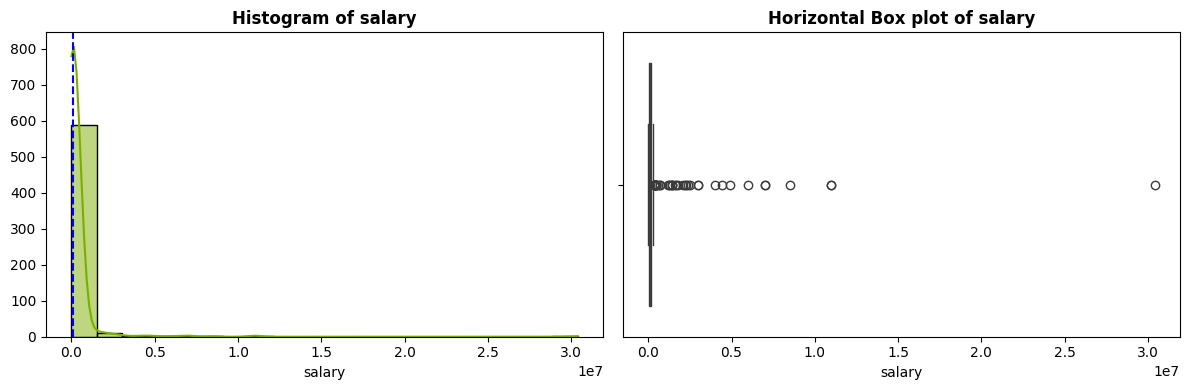

In [100]:
num_features = ["salary"]
def plot_numerical_features(df=df_salaries, numerical_features = num_features):
    fig, axes = plt.subplots(len(numerical_features), 2, figsize=(12, len(numerical_features)*4))
    axes = np.atleast_2d(axes)

    for i, feature in enumerate(numerical_features):
        sns.histplot(data=df[feature], color="#7CAE00", bins = 20, kde=True, ax=axes[i, 0])
        axes[i, 0].set_title(f"Histogram of {feature}", weight="bold")
        axes[i, 0].set_ylabel("")
        axes[i, 0].axvline(df[feature].median(), color="blue", linestyle="--", label="Median Train")

        sns.boxplot(data=df[feature], color="#00BFC4", orient="h", ax=axes[i, 1])
        axes[i, 1].set_title(f"Horizontal Box plot of {feature}", weight="bold")
        axes[i, 1].set_xlabel(feature)

    plt.tight_layout()
    plt.show()

plot_numerical_features()

In [101]:
num_features = ["salary", "salary_in_usd"]
def check_skewness(data = df_salaries, numerical_features = num_features, highlight=True, sort=True):
    skewness_dict = {}
    skew_feature = []
    for feature in numerical_features:
        skew = data[feature].skew(skipna=True)
        skewness_dict[feature] = skew

    skew_df = pd.DataFrame.from_dict(skewness_dict, orient="index", columns=["Skewness"])
    if sort:
        skew_df = skew_df.reindex(skew_df["Skewness"].abs().sort_values(ascending=False).index)
    else:
        pass
    
    print(f"\n🔍 Skewness for dataset:")
    print("-"*70)
    print(f"{'Feature':<30} | {'Skewness':<10} | {'Remark'}")
    print("-"*70)
    for feature, row in skew_df.iterrows():
        skew = row["Skewness"]
        abs_skew = abs(skew)
        if abs_skew > 1:
            remark = "Highly skewed"
            color = "\033[91m"  
        elif abs_skew > 0.5:
            remark = "Moderately skewed"
            color = "\033[93m"  
        else:
            remark = "Approximately symmetric"
            color = ""
        endc = "\033[0m" if color else ""
        if highlight and color:
            print(f"{color}{feature:<30} | {skew:>+10f} | {remark}{endc}")
            skew_feature.append(feature)
        else:
            print(f"{feature:<30} | {skew:>+10f} | {remark}")
    print("-"*70)
    return skew_feature, skew_df

skew_feature, skew_df = check_skewness()


🔍 Skewness for dataset:
----------------------------------------------------------------------
Feature                        | Skewness   | Remark
----------------------------------------------------------------------
salary                         | +14.052915 | Highly skewed
salary_in_usd                  |  +1.667545 | Highly skewed
----------------------------------------------------------------------


### Insights on Numerical Feature Distributions

**Shape and Spread of Distributions**

- The distribution salary variable is **highly imbalanced**, with most values in the low range and many extreme outliers.

**Skewness Analysis**

- The features: `salary` and `salary_in_usd`  have **skewness values** greater than 0.5, indicating that the distributions are **Highly/Moderately symmetric**. Many model assumes **normal distribution** but in reality data points may not be perfectly symmetric. If the data are skewed, then this kind of model will always underestimate the skewness risk.The more the data is skewed the less accurate the model will be. We need to handle skewness in chapter **Data Preprocessing**

## Spearman Rank Correlation Analysis of Numerical Features

**What is Spearman Correlation?**

**Spearman’s rank correlation (ρ, rho)** measures the **strength and direction of a monotonic relationship** between two variables, based on their **ranks** rather than raw values.

* The correlation coefficient (ρ) ranges from **-1 to 1**.
* Unlike Pearson, Spearman can capture both **linear** and **non-linear monotonic** relationships.
* It is **less sensitive to outliers** since it works with ranks.

**Interpretation of Spearman Correlation Values**

| Value of ρ | Relationship Type           | Interpretation                                  |
| ---------- | --------------------------- | ----------------------------------------------- |
| `ρ ≈ 1`    | Strong positive correlation | As X increases, Y also increases monotonically  |
| `ρ ≈ -1`   | Strong negative correlation | As X increases, Y decreases monotonically       |
| `ρ ≈ 0`    | No monotonic correlation    | No clear monotonic relationship between X and Y |

**Common interpretation of |ρ|**

* **0.00–0.19** → Very weak
* **0.20–0.39** → Weak
* **0.40–0.59** → Moderate
* **0.60–0.79** → Strong
* **0.80–1.00** → Very strong

**Spearman Correlation Formula**

Spearman correlation is simply the **Pearson correlation applied to the ranked variables**:

$$
ρ = 1 - \frac{6 \sum d_i^2}{n(n^2 - 1)}
$$

* \$d\_i\$: difference between ranks of \$x\_i\$ and \$y\_i\$
* \$n\$: number of observations

If no ties exist, this shortcut formula applies.
Otherwise, Spearman is computed by ranking each variable and applying Pearson correlation to those ranks.

In [184]:
df_salaries.drop(columns=cat_features, axis=1).corr(numeric_only=True, method="pearson")

,salary,salary_in_usd
salary,1.000000,-0.083906
salary_in_usd,-0.083906,1.000000


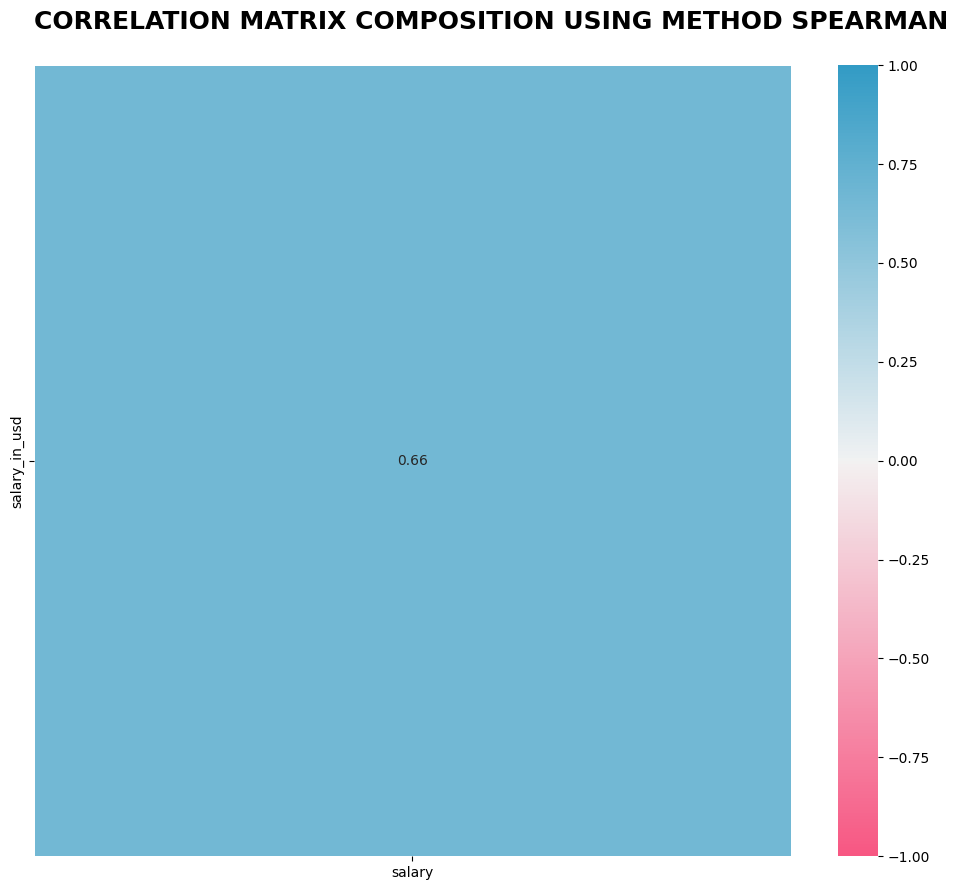

In [183]:
corr_matrix = df_salaries.drop(columns=cat_features, axis=1).corr(numeric_only=True, method="spearman")
# one_like can build a matrix of boolean(True, False) with the same shape as our data
ones_corr = np.ones_like(corr_matrix, dtype=bool)
mask = np.triu(ones_corr)
adjusted_mask = mask[1:, :-1]
adjusted_cereal_corr = corr_matrix.iloc[1:, :-1]

fig, ax = plt.subplots(figsize = (10, 9))
# That method uses HUSL colors, so you need hue, saturation, and lightness. 
# I used hsluv.org to select the colors of this chart.
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

sns.heatmap(data=adjusted_cereal_corr, mask=adjusted_mask,
            annot=True, fmt=".2f", cmap=cmap,
            vmin=-1, vmax=1, linecolor="white", linewidths=0.5)

title = "CORRELATION MATRIX COMPOSITION USING METHOD SPEARMAN\n"
ax.set_title(title, loc="left", fontsize=18, weight="bold")

plt.tight_layout()
plt.show()

### **Insights from Correlation Analysis of Numerical Features**

**Observed Result**

* The **Spearman correlation** between `salary` and `salary_in_usd` is **0.66**.
* This indicates a **strong positive correlation**, based on the common interpretation scale (0.60–0.79).

**Comparison with Pearson**

* Previously, the **Pearson correlation** was very low (**-0.08**), suggesting almost no linear relationship.
* In contrast, Spearman reveals a fairly strong **monotonic relationship**: as `salary` increases, `salary_in_usd` also tends to increase, even if not in a perfectly linear way.
* This shows that there is a **consistent upward trend**, but due to outliers or a non-linear relationship, Pearson fails to capture it, while Spearman does.

**Reasons for the Difference**

* **Outliers**: Extremely high or low salaries distort Pearson correlation, while Spearman, based on ranks, is less sensitive.
* **Non-linearity**: The relationship between raw salary and its USD conversion may follow a logarithmic, step-like, or more complex pattern. Spearman can still detect the monotonic trend without requiring strict linearity.

**Conclusion**

* Since salary data often contains large outliers, **Spearman is a more suitable choice than Pearson** in this context.
* The coefficient of 0.66 indicates a **fairly strong monotonic association** between `salary` and `salary_in_usd`.

**Summary**: The Spearman result (0.66) confirms that **base salary and salary in USD are strongly positively related in terms of trend**. Pearson failed to capture this due to outliers and non-linear effects.

## Categorical Feature Distributions

In [103]:
def label_JobTitle(row):
    if row["job_title"] in ["Data Scientist", "Applied Data Scientist", "Principal Data Scientist", "Staff Data Scientist", "Lead Data Scientist", 
                            "Research Scientist", "AI Scientist", "NLP Engineer", "Computer Vision Engineer", "Computer Vision Software Engineer", 
                            "3D Computer", "Vision Researcher", "Data Science Engineer", "Data Specialist"]:
        return "Data Science & Research"
    elif row["job_title"] in ["Data Engineer", "Big Data Engineer", "Lead Data Engineer", "Principal Data Engineer", "Cloud Data Engineer", "Data Architect",
                              "Big Data Architect", "Data Engineering Manager", "Director of Data Engineering"]:
        return "Data Engineering & Architecture"
    elif row["job_title"] in ["Data Analyst", "BI Data Analyst", "Business Data Analyst", "Product Data Analyst", "Financial Data Analyst", "Marketing Data Analyst",
                              "Data Analytics Engineer", "Analytics Engineer", "Data Analytics Manager", "Data Analytics Lead", "Lead Data Analyst",
                              "Principal Data Analyst"]:
        return "Analytics & Business Intelligence"

    else:
        return "Leadership & Management"

df_salaries["job_category"] = df_salaries.apply(label_JobTitle, axis=1)
df_salaries.drop(columns="job_title", axis=1, inplace=True)

In [104]:
def label_Employee_Residence(row):
    if row["employee_residence"] in ["US", "CA", "MX", "PR"]:
        return "North America"
    elif row["employee_residence"] in ["GB", "DE", "FR", "ES", "GR", "PT", "NL", "IT", 
                                       "PL", "RU", "TR", "AT", "RO", "DK", "BE", "SI", 
                                       "HU", "EE", "CH", "CZ", "HR", "IE", "LU", "MT"]:
        return "Europe"
    else:
        return "Other"
df_salaries["employee_residence_category"] = df_salaries.apply(label_Employee_Residence, axis=1)
df_salaries.drop(columns="employee_residence", axis=1, inplace=True)

In [111]:
df_salaries["salary_currency_bin"] = (df_salaries["salary_currency"] == "USD").map({True: "USD", False: "Other"}).astype("category")
df_salaries.drop(columns="salary_currency", axis=1, inplace=True)

In [116]:
df_salaries["company_loc_bin"] = (df_salaries["company_location"] == "US").map({True: "US", False: "Other"}).astype("category")
df_salaries.drop(columns="company_location", axis=1, inplace=True)

In [123]:
cat_features = ["remote_ratio", "work_year", "experience_level", "employment_type", "job_category", "salary_currency_bin",
                "employee_residence_category", "company_loc_bin", "company_size"]

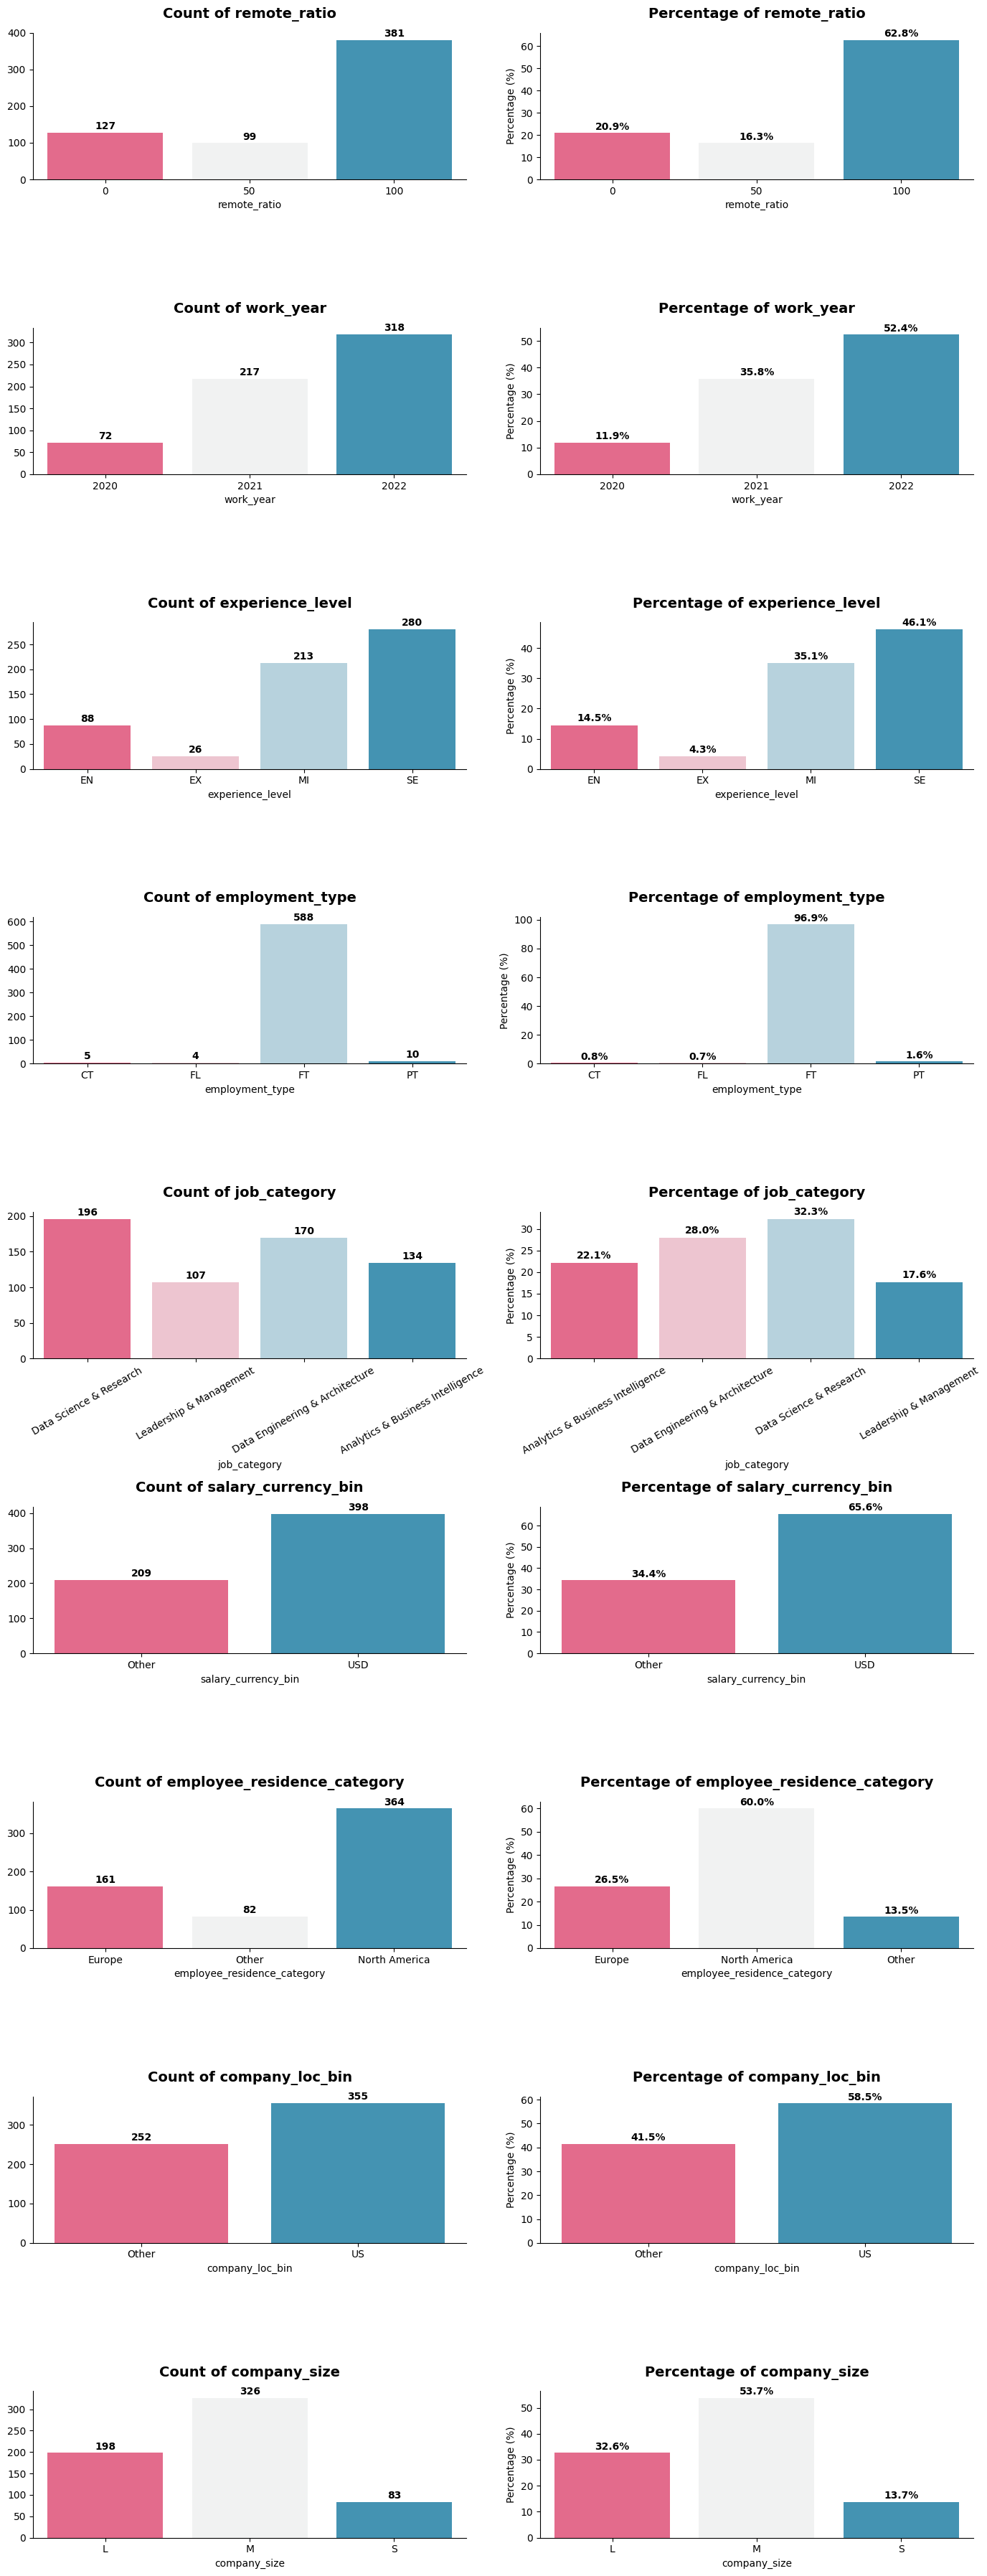

In [124]:
def plot_categorical_distribution(df, cat_features):
    fig, ax = plt.subplots(len(cat_features), 2, figsize=(14, len(cat_features)*4))
    ax = np.atleast_2d(ax)

    for i, feature in enumerate(cat_features):
        # ----------------------------
        # LEFT: Vertical Countplot
        # ----------------------------
        sns.countplot(data=df, x=feature, ax=ax[i, 0],
                      palette=color(n_colors=len(df[feature].unique())))
        
        ax[i, 0].set_title(f"Count of {feature}", fontsize=14, pad=15, weight="bold")
        ax[i, 0].set_xlabel(feature)
        if feature == "job_category":
            ax[i, 0].set_xticklabels(labels = ax[i, 0].get_xticklabels(), rotation = 30)
        ax[i, 0].set_ylabel("")
        sns.despine(ax=ax[i, 0], top=True, right=True)

        # Add count labels on top
        for p in ax[i, 0].patches:
            height = p.get_height()
            x = p.get_x() + p.get_width() / 2
            ax[i, 0].text(x, height + max(df[feature].value_counts()) * 0.01,
                          f"{int(height)}",
                          ha="center", va="bottom", fontsize=10, fontweight="bold")

        # ----------------------------
        # RIGHT: Barplot with % labels
        # ----------------------------
        feature_counts = df[feature].value_counts(normalize=True).sort_index()
        percentage_df = feature_counts.mul(100).round(2).reset_index()
        percentage_df.columns = [feature, "Percentage"]

        sns.barplot(data=percentage_df, x=feature, y="Percentage",
                    ax=ax[i, 1],
                    palette=color(n_colors=len(feature_counts)))
        
        ax[i, 1].set_title(f"Percentage of {feature}", fontsize=14, pad=15, weight="bold")
        ax[i, 1].set_ylabel("Percentage (%)")
        if feature == "job_category":
            ax[i, 1].set_xticklabels(labels = ax[i, 1].get_xticklabels(), rotation = 30)
        ax[i, 1].set_xlabel(feature)
        sns.despine(ax=ax[i, 1], top=True, right=True)

        # Add % labels on top
        for p in ax[i, 1].patches:
            height = p.get_height()
            x = p.get_x() + p.get_width() / 2
            ax[i, 1].text(x, height + 0.5,
                          f"{height:.1f}%",
                          ha="center", va="bottom", fontsize=10, fontweight="bold")

    plt.tight_layout()
    plt.show()

plot_categorical_distribution(df=df_salaries, cat_features=cat_features)

### Insight on categorical Feature Distribution

* **Remote ratio:** 100% remote **62.8%**, on-site **20.9%**, hybrid **16.3%** → dataset is **remote-first**.
* **Work year:** **2022 = 52.4%**, 2021 = **35.8%**, 2020 = **11.9%** → concentrated in recent years.
* **Experience level:** **Senior 46.1%**, Mid 35.1%, Entry 14.5%, Executive 4.3% → skewed toward **senior** roles.
* **Employment type:** **Full-time 96.9%** → almost all samples are FT.
* **Job category (4 groups):** Data Science & Research **32.3%** > Data Engineering & Architecture **28.0%** > Analytics & BI **22.1%** > Leadership **17.6%**.
* **Salary currency (bin):** **USD 65.6%**, Other 34.4% → USD-dominant market.
* **Employee residence (region):** **North America 60.0%**, Europe 26.5%, Other 13.5% → strong **NA/US** bias.
* **Company location (bin):** **US 58.5%**, Other 41.5% → aligns with residence distribution.
* **Company size:** **Medium 53.7%**, Large 32.6%, Small 13.7% → mid-sized companies dominate.

## Bivariate Analysis

,remote_ratio,Count,Mean_target_feature,Median_target_feature,Std_target_feature
2,100,381,122457.454068,115000.000000,72710.843718
0,0,127,106354.622047,99000.000000,67724.540800
1,50,99,80823.030303,69999.000000,57353.093614


🔎 D’Agostino and Pearson Normality Test for 'salary_in_usd' across 'remote_ratio' groups

 Group: 0 (n = 127)
  Statistic : 44.767
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 50 (n = 99)
  Statistic : 82.830
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 100 (n = 381)
  Statistic : 156.277
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.


🔍 Kruskal-Wallis Test: salary_in_usd ~ remote_ratio
Kruskal-Wallis H-statistic: 40.110
p-value: 1.950760665277205e-09
🟢 Significant difference found. Running Dunn's Post-Hoc Test...
            0            50           100
0    1.000000  2.135426e-03  4.333953e-02
50   0.002135  1.000000e+00  1.274067e-09
100  0.043340  1.274067e-09  1.000000e+00


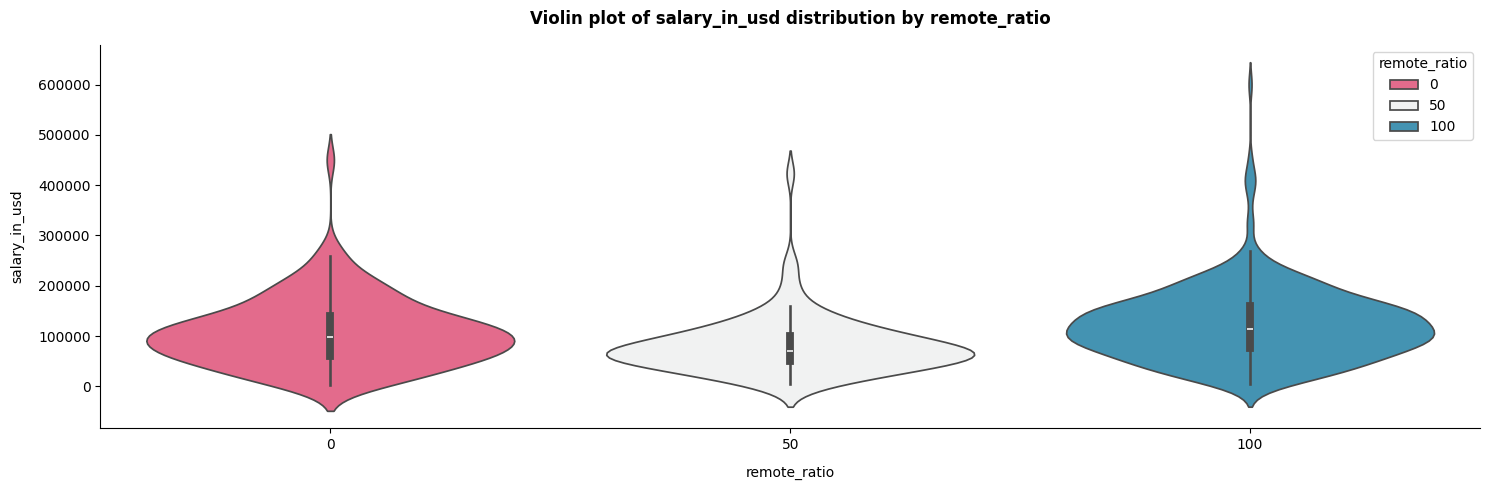

,work_year,Count,Mean_target_feature,Median_target_feature,Std_target_feature
2,2022,318,124522.006289,120000.000000,58183.647585
1,2021,217,99853.792627,82528.000000,80225.106319
0,2020,72,95813.000000,75544.000000,82831.799222


🔎 D’Agostino and Pearson Normality Test for 'salary_in_usd' across 'work_year' groups

 Group: 2020 (n = 72)
  Statistic : 51.478
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 2021 (n = 217)
  Statistic : 129.805
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 2022 (n = 318)
  Statistic : 47.618
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.


🔍 Kruskal-Wallis Test: salary_in_usd ~ work_year
Kruskal-Wallis H-statistic: 46.727
p-value: 7.132756674842484e-11
🟢 Significant difference found. Running Dunn's Post-Hoc Test...
          2020          2021          2022
2020  1.000000  1.000000e+00  2.791229e-06
2021  1.000000  1.000000e+00  9.596513e-09
2022  0.000003  9.596513e-09  1.000000e+00


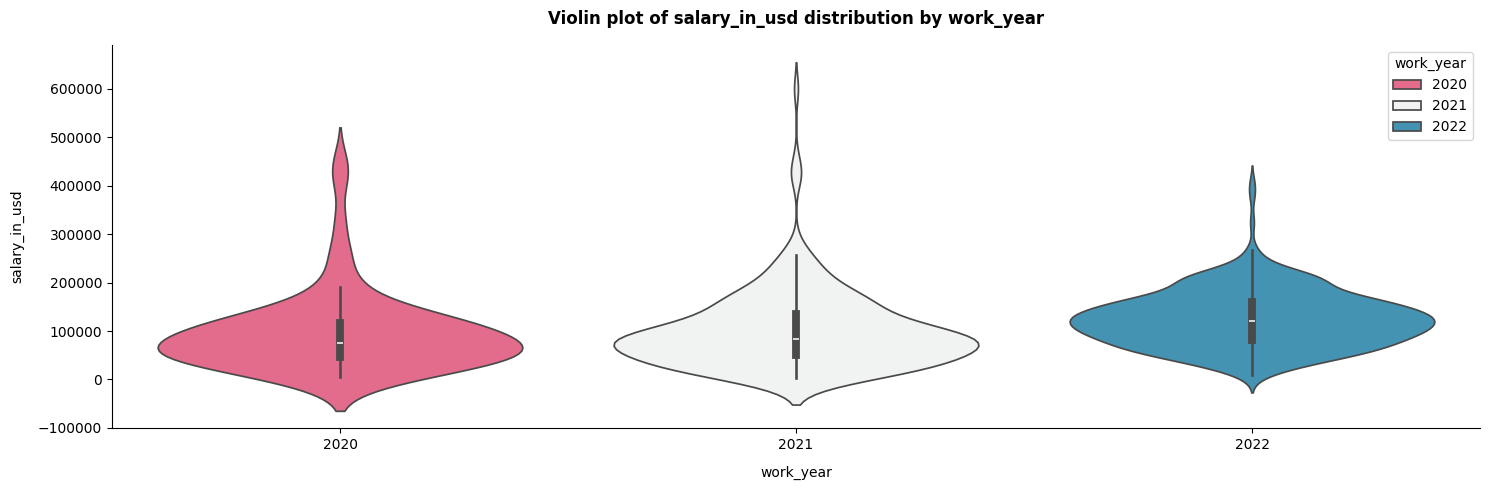

,experience_level,Count,Mean_target_feature,Median_target_feature,Std_target_feature
1,EX,26,199392.038462,171437.500000,117071.255697
3,SE,280,138617.292857,135500.000000,57691.978337
2,MI,213,87996.056338,76940.000000,63901.057478
0,EN,88,61643.318182,56500.000000,44395.541126


🔎 D’Agostino and Pearson Normality Test for 'salary_in_usd' across 'experience_level' groups

 Group: MI (n = 213)
  Statistic : 147.890
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: SE (n = 280)
  Statistic : 61.599
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: EN (n = 88)
  Statistic : 36.288
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: EX (n = 26)
  Statistic : 20.181
  p-value   : 0.00004
  🔴 Interpretation: Data does not appear to follow a normal distribution.


🔍 Kruskal-Wallis Test: salary_in_usd ~ experience_level
Kruskal-Wallis H-statistic: 190.111
p-value: 5.777441885479927e-41
🟢 Significant difference found. Running Dunn's Post-Hoc Test...
              EN            EX            MI            SE
EN  1.000000e+00  2.039042e-14  6.477411e-03  7.578934e-27
EX  2.039042e-14  1.000000e+00  5.961938e-10 

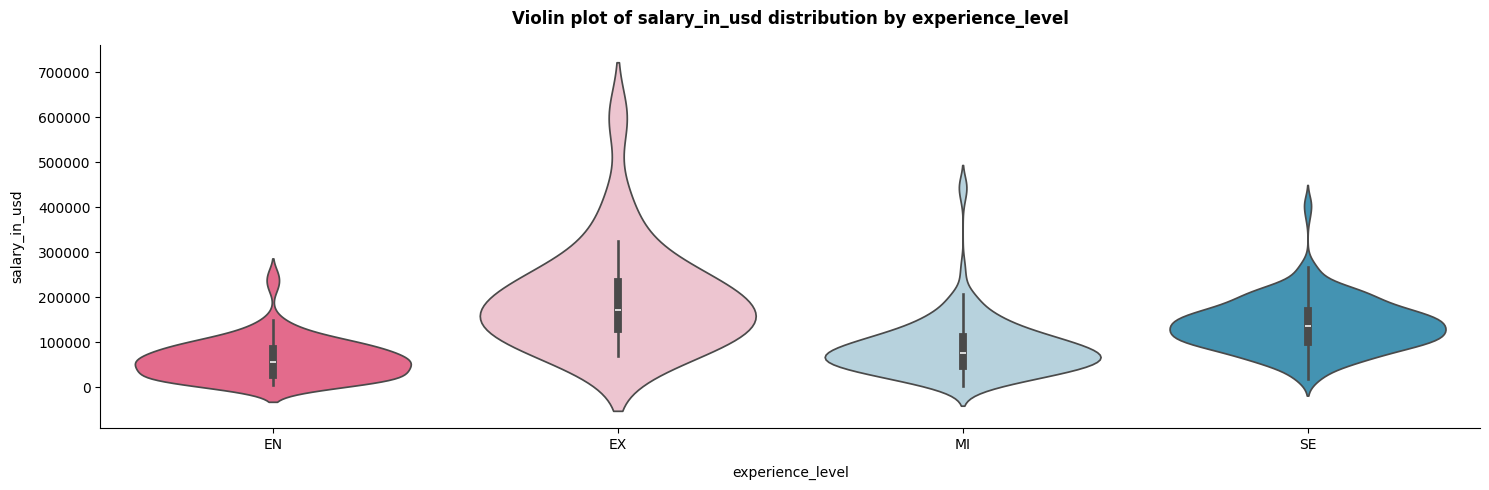

,employment_type,Count,Mean_target_feature,Median_target_feature,Std_target_feature
0,CT,5,184575.000000,105000.000000,156250.889997
2,FT,588,113468.073129,104196.500000,69476.470098
1,FL,4,48000.000000,40000.000000,40529.824410
3,PT,10,33070.500000,18817.500000,31472.907966


🔎 D’Agostino and Pearson Normality Test for 'salary_in_usd' across 'employment_type' groups

 Group: FT (n = 588)
  Statistic : 233.337
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: CT (n = 5)
⚠️ Too few observations (< 8) to perform the test.

 Group: PT (n = 10)
  Statistic : 4.424
  p-value   : 0.10946
  🟢 Interpretation: Data appears to follow a normal distribution.

 Group: FL (n = 4)
⚠️ Too few observations (< 8) to perform the test.


🔍 Kruskal-Wallis Test: salary_in_usd ~ employment_type
Kruskal-Wallis H-statistic: 22.419
p-value: 5.336928274339553e-05
🟢 Significant difference found. Running Dunn's Post-Hoc Test...
          CT        FL        FT        PT
CT  1.000000  0.193495  1.000000  0.011738
FL  0.193495  1.000000  0.201111  1.000000
FT  1.000000  0.201111  1.000000  0.000192
PT  0.011738  1.000000  0.000192  1.000000


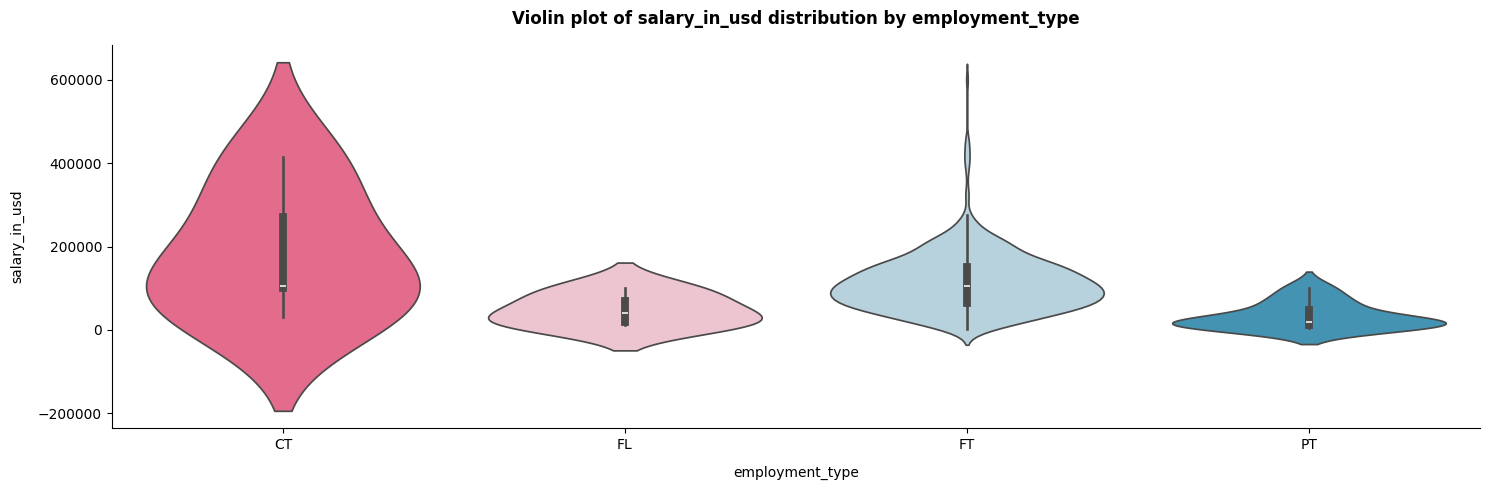

,job_category,Count,Mean_target_feature,Median_target_feature,Std_target_feature
3,Leadership & Management,107,121514.850467,102839.000000,77710.075308
1,Data Engineering & Architecture,170,119729.770588,111137.500000,70529.938797
2,Data Science & Research,196,109824.341837,100000.000000,73470.062757
0,Analytics & Business Intelligence,134,99127.507463,95850.000000,59752.729060


🔎 D’Agostino and Pearson Normality Test for 'salary_in_usd' across 'job_category' groups

 Group: Data Science & Research (n = 196)
  Statistic : 71.335
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Leadership & Management (n = 107)
  Statistic : 15.615
  p-value   : 0.00041
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Data Engineering & Architecture (n = 170)
  Statistic : 104.523
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Analytics & Business Intelligence (n = 134)
  Statistic : 97.665
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.


🔍 Kruskal-Wallis Test: salary_in_usd ~ job_category
Kruskal-Wallis H-statistic: 8.946
p-value: 0.03001694441131294
🟢 Significant difference found. Running Dunn's Post-Hoc Test...
                                   Analytics & Business Intelligence  \

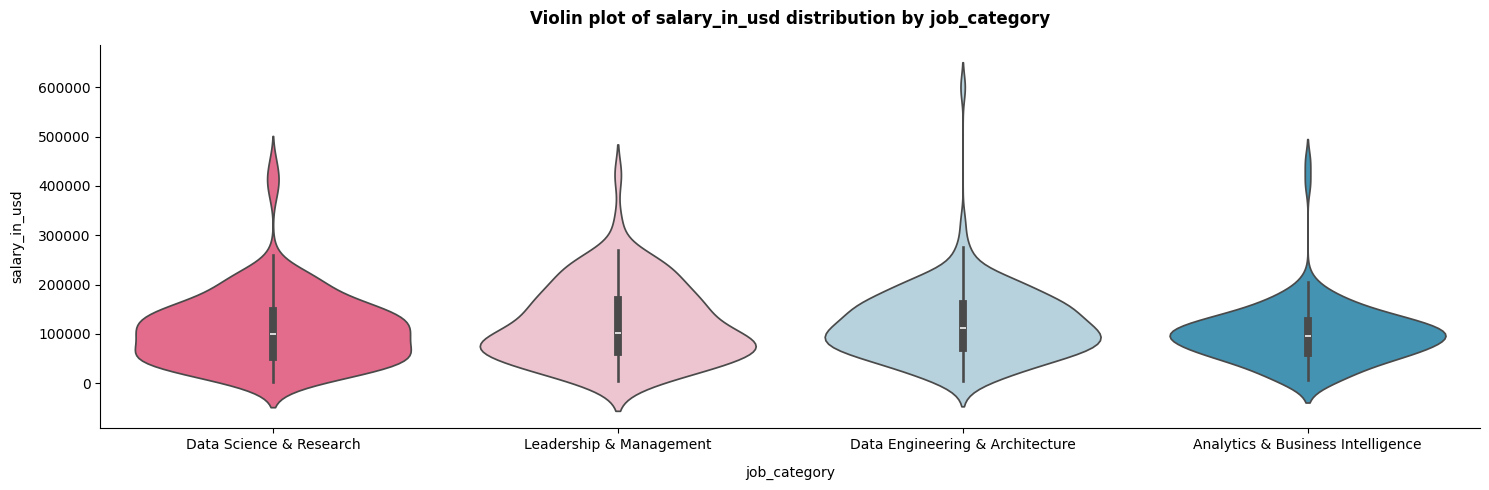

,salary_currency_bin,Count,Mean_target_feature,Median_target_feature,Std_target_feature
1,USD,398,137264.788945,130000.000000,72025.775052
0,Other,209,64753.210526,62649.000000,36102.945673


🔎 D’Agostino and Pearson Normality Test for 'salary_in_usd' across 'salary_currency_bin' groups

 Group: Other (n = 209)
  Statistic : 28.973
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: USD (n = 398)
  Statistic : 167.272
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'salary_in_usd' by 'salary_currency_bin'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 12836.0
p-value     : 1.413812962511379e-44

✅ Result: Statistically significant difference between the two groups (Reject H₀).
 Interpretation: Group 'USD' has a higher median 'salary_in_usd' than Group 'Other'.


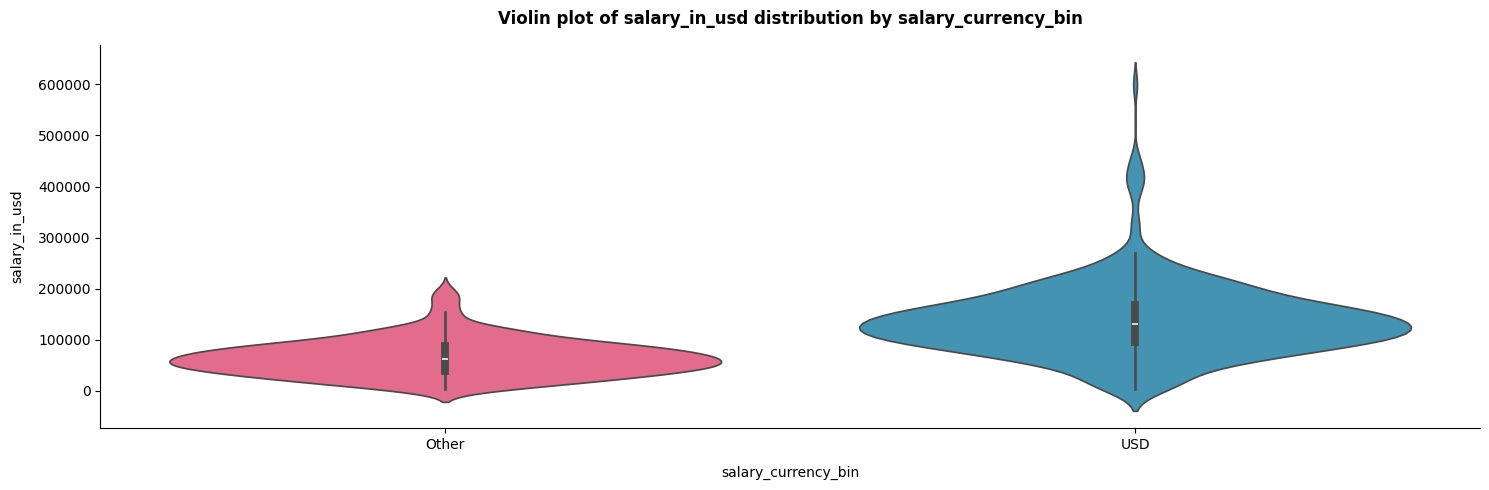

,employee_residence_category,Count,Mean_target_feature,Median_target_feature,Std_target_feature
1,North America,364,144352.447802,135000.000000,68286.293596
0,Europe,161,69065.478261,62726.000000,34630.378454
2,Other,82,54889.926829,39200.000000,52286.317888


🔎 D’Agostino and Pearson Normality Test for 'salary_in_usd' across 'employee_residence_category' groups

 Group: Europe (n = 161)
  Statistic : 46.761
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Other (n = 82)
  Statistic : 32.363
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: North America (n = 364)
  Statistic : 195.478
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.


🔍 Kruskal-Wallis Test: salary_in_usd ~ employee_residence_category
Kruskal-Wallis H-statistic: 259.015
p-value: 5.697318752014994e-57
🟢 Significant difference found. Running Dunn's Post-Hoc Test...
                     Europe  North America         Other
Europe         1.000000e+00   2.644047e-39  2.821927e-01
North America  2.644047e-39   1.000000e+00  4.104693e-33
Other          2.821927e-01   4.104693e-33  1.000000e+00


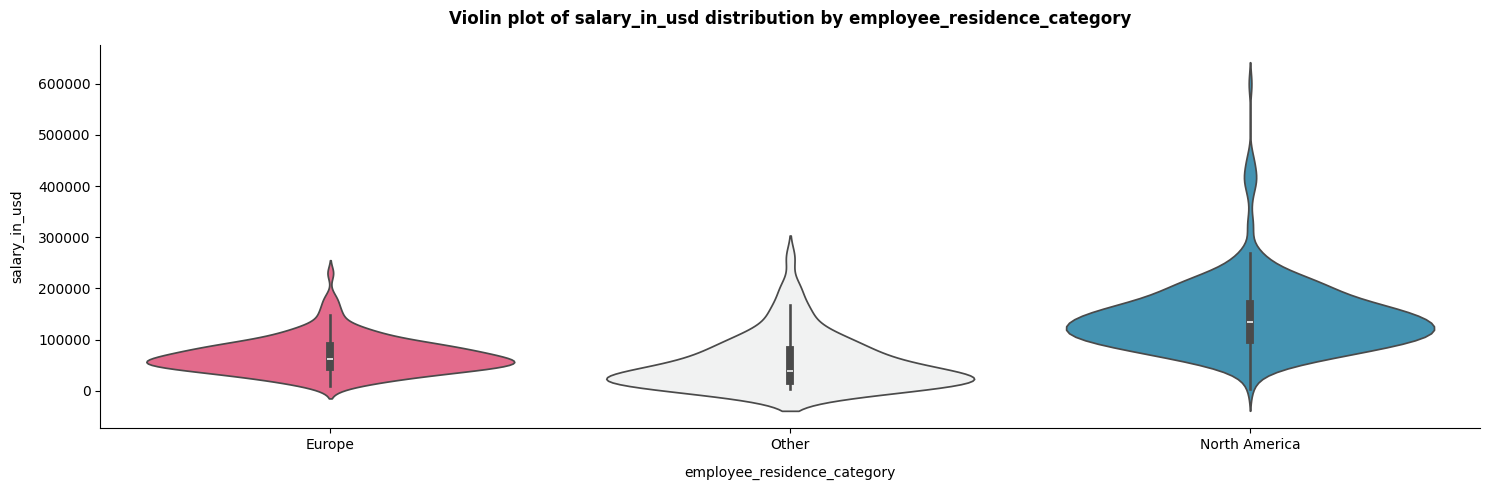

,company_loc_bin,Count,Mean_target_feature,Median_target_feature,Std_target_feature
1,US,355,144055.261972,135000.000000,69906.895041
0,Other,252,67560.273810,62688.500000,42753.138015


🔎 D’Agostino and Pearson Normality Test for 'salary_in_usd' across 'company_loc_bin' groups

 Group: Other (n = 252)
  Statistic : 64.975
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: US (n = 355)
  Statistic : 178.442
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'salary_in_usd' by 'company_loc_bin'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 12205.5
p-value     : 1.086423714133193e-52

✅ Result: Statistically significant difference between the two groups (Reject H₀).
 Interpretation: Group 'US' has a higher median 'salary_in_usd' than Group 'Other'.


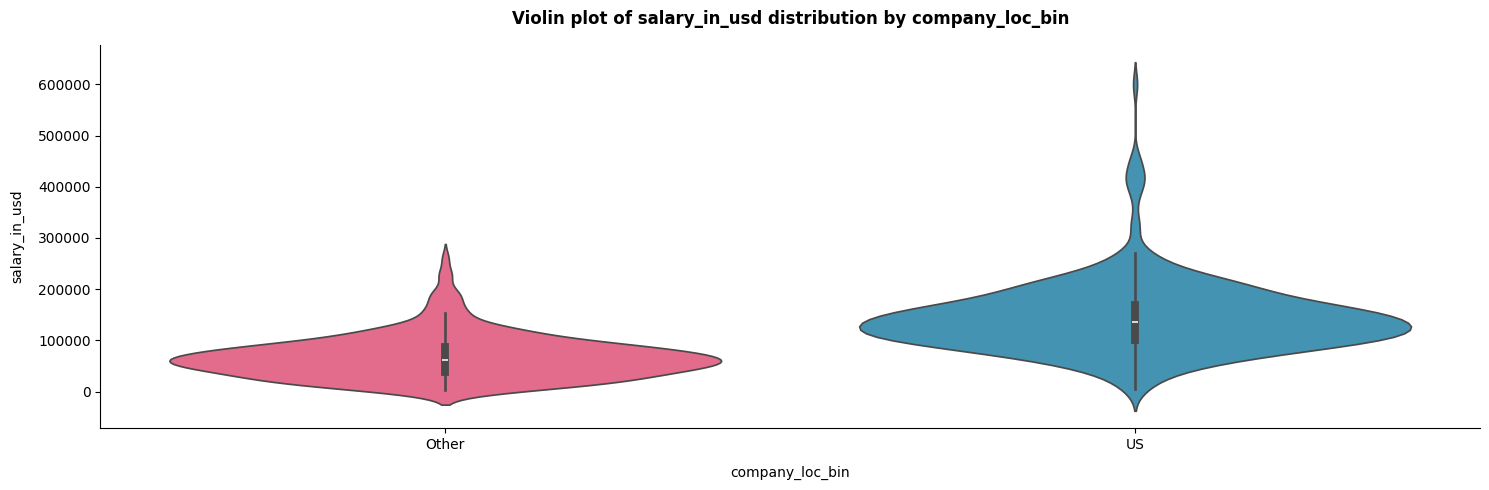

,company_size,Count,Mean_target_feature,Median_target_feature,Std_target_feature
0,L,198,119242.994949,100000.000000,86156.740692
1,M,326,116905.466258,113188.000000,59287.694614
2,S,83,77632.674699,65000.000000,63461.706497


🔎 D’Agostino and Pearson Normality Test for 'salary_in_usd' across 'company_size' groups

 Group: L (n = 198)
  Statistic : 100.097
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: S (n = 83)
  Statistic : 64.327
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: M (n = 326)
  Statistic : 49.699
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.


🔍 Kruskal-Wallis Test: salary_in_usd ~ company_size
Kruskal-Wallis H-statistic: 36.411
p-value: 1.2402004174267158e-08
🟢 Significant difference found. Running Dunn's Post-Hoc Test...
          L             M             S
L  1.000000  5.466600e-01  6.258927e-06
M  0.546660  1.000000e+00  5.101427e-09
S  0.000006  5.101427e-09  1.000000e+00


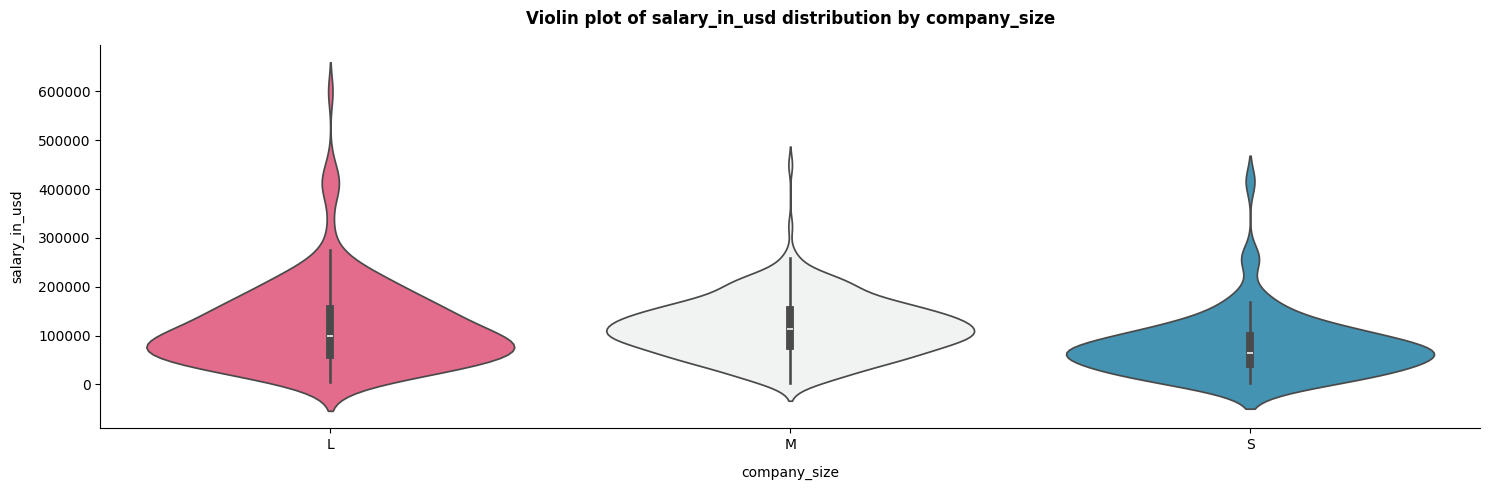

In [125]:
from IPython.core.display import HTML
target_feature = "salary_in_usd"
def perform_statical_testing(total_categories, feature, df_train = df_salaries, target_feature = target_feature):
    cal_normaltest(cat_feature=feature, num_feature=target_feature, df=df_train)
    if total_categories == 2:
        cal_mannwhitneyu(dataframe=df_train, categorical_feature=feature, num_feature=target_feature)
    else:
        perform_kruskal_test(df=df_train, categorical_feature=feature, numeric_feature=target_feature)

def plot_categorical_distribution_by_target_feature(feature, df_train = df_salaries, target_feature = target_feature, order = None):
    """
    Performs statical testing for each groups (distribution by target_feature) by ANOVA, T-test, Mann-Whitney U test,... <br>
    Draw violin and histogram to display the distribution for each groups of feature.
    Parameters:
        feature (str): The name of the column representing the grouping variable (categorical).
        df_train (pd.DataFrame): The input dataset.
        target_feature (str): The name of the column representing the target feature.
        order (list): Order items in plot.

    Returns:
        None
    """

    # Summary information
    df_summary_feature = df_train.groupby(by = feature, as_index= False)\
    .agg (
        Count = (target_feature, "count"),
        Mean_target_feature = (target_feature, "mean"),
        Median_target_feature = (target_feature, "median"),
        Std_target_feature = (target_feature, "std")
    )
    df_summary_feature = df_summary_feature.sort_values(by="Mean_target_feature", ascending=False)    

    summary_data = [
        ("Total Categories", f"{df_summary_feature.shape[0]}"),
        ("Overall Target Mean", f"{df_train[target_feature].mean():.2f}")
    ]
    summary_html = "<ul>" + "".join([f"<li><b>{k}:</b> {v}</li>" for k, v in summary_data]) + "</ul>"
    display(HTML(summary_html))
    display(df_summary_feature.style.background_gradient(cmap=cmap).set_table_attributes('style="width:75%; margin:auto;"'))

    perform_statical_testing(total_categories=df_summary_feature.shape[0], 
                             feature=feature, df_train=df_train, target_feature=target_feature)

    # Plot distribution
    fig, ax = plt.subplots(figsize=(15, 5))
    sns.violinplot(x=feature, y=target_feature, data=df_train, hue=feature, 
                palette=color(n_colors=df_train[feature].nunique()), ax=ax)
    ax.set_title(f"Violin plot of {target_feature} distribution by {feature}", pad=15, weight = "bold")
    ax.set_xlabel(feature, labelpad=10)
    ax.set_ylabel(target_feature, labelpad=10)
    # plt.grid(axis="y", color="gray", linestyle=":", alpha=0.7)
    sns.despine(left=False, bottom=False, ax=ax)

    plt.tight_layout()
    plt.show()

for feature in cat_features:
    display(HTML(f"<h2 style='text-align:center; font-size:22px; color:blue;'><b>Distribution of {target_feature} by {feature}</b></h2>"))
    plot_categorical_distribution_by_target_feature(feature=feature)

### Insight for Categorical Features by salary_in_usd

`remote_ratio`

Employees **fully remote earn the highest salaries**, hybrid the lowest, on-site in between — the differences are **statistically significant**.

`work_year`

Data/ML salaries rose markedly in 2022, while 2021 ≈ 2020.

`experience_level`

Salaries rise sharply with experience; Executive ≈ Senior are highest, Mid-level in the middle, Entry-level lowest.

`employment_type`

 **Full-time ≈ Contract** (both ~\$105k). **Part-time is the lowest**, **Freelance** is lower on average (~\$40k) but based on a **tiny sample**.

`job_category`

A modest **premium for Data Engineering** vs **Analytics/BI**; **Leadership** and **Data Science** are **not significantly different** from Data Engineering in the full sample.

`salary_currency_bin`

Salaries paid in **USD** are **substantially higher** than those paid in other currencies, with a large and statistically significant effect.

`employee_residence_category`

North America salaries are **substantially higher**—median **\~\$135k** vs **\~\$62.7k** (Europe, \~**2.1×**) and **\~\$39.2k** (Other, \~**3.4×**). Europe and Other are **not significantly different** from each other.

`company_loc_bin`

Companies **based in the US** pay **substantially higher salaries** than those elsewhere; the gap is both **statistically** and **practically** large.

`company_size`

**Small companies pay significantly less.** Medium and large companies are statistically similar overall, with **medium firms showing the highest median** pay.

**SUMMARY TABLE**

| Feature / Analysis Area                     | Key Insights                                                                                                                                | Statistical Significance                                                                                         | Practical Implication                                                                              |
| ------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------- | ---------------------------------------------------------------------------------------------------------------- | -------------------------------------------------------------------------------------------------- |
| **remote\_ratio**                           | **100% remote earns the most**, on-site in the middle, **hybrid lowest**. Medians: \~115k (100) vs \~99k (0) vs \~70k (50).                 | D’Agostino–Pearson: non-normal in all groups. Kruskal–Wallis **p≈1.95e-09**. Dunn: all pairwise **significant**. | Keep `remote_ratio` as a categorical driver. Expect positive premium for fully remote roles.       |
| **work\_year**                              | Salaries **rose sharply in 2022**; **2021 ≈ 2020**. Medians: 2022 \~120k; 2021 \~82.5k; 2020 \~75.5k.                                       | Non-normal. Kruskal–Wallis **p≈7.13e-11**. Dunn: **2022 > 2021, 2020**; **2021 ≈ 2020**.                         | Include `work_year` (categorical). Useful for capturing market uplift in 2022.                     |
| **experience\_level**                       | Clear ladder: **EX ≈ SE > MI > EN**. Means (k): EX~~199.9, SE~~138.6, MI~~88.0, EN~~61.6.                                                   | Non-normal. Kruskal–Wallis **p≈5.78e-41**. Dunn: all pairs significant **except EX vs SE**.                      | Strongest human-capital signal. Encode as categorical (or ordinal) and consider log-salary.        |
| **employment\_type**                        | **FT ≈ CT** (\~105k). **PT is lowest** (\~18.8k). **FL** \~40k but sample is tiny.                                                          | FT non-normal; CT/FL very small n. Kruskal–Wallis **p≈5.34e-05**. Dunn: **PT < FT/CT**; others ns.               | Severe class imbalance (FT\~97%). For modeling, consider **FT vs Other** bin.                      |
| **job\_category**                           | Modest premium for **Data Engineering & Architecture** over **Analytics & BI**. **Leadership** and **Data Science** not different from Eng. | Non-normal. Kruskal–Wallis **p=0.030**. Dunn: only **Eng > Analytics/BI (p≈0.038)**.                             | Keep as 4-group categorical; effect is small but informative.                                      |
| **salary\_currency\_bin** (USD vs Other)    | **USD salaries much higher**. Medians: **USD \~130k** vs **Other \~62.6k** (\~2×).                                                          | Non-normal. **Mann–Whitney p≈1.41e-44**; effect size **r≈0.69** (large).                                         | Strong proxy for US market; may collineate with region. Use with care alongside location features. |
| **employee\_residence\_category**           | **North America highest** (median \~135k) vs **Europe \~62.7k** and **Other \~39.2k**. Europe ≈ Other.                                      | Non-normal. Kruskal–Wallis **p≈5.7e-57**. Dunn: **NA > Europe/Other**; **Europe ≈ Other**.                       | Region is highly predictive; consider using **region OR currency**, not both, to limit redundancy. |
| **company\_loc\_bin** (US vs Other)         | **US-based companies pay substantially more**. Medians: US \~135k vs Other \~62.7k.                                                         | Non-normal. **Mann–Whitney p≈1.09e-52**; effect size **r≈0.73** (very large).                                    | Very strong driver; overlaps with USD and NA residence. Control for confounders in regression.     |
| **company\_size**                           | **Small companies pay less**. **M ≈ L > S**. Medians: M \~113k, L \~100k, S \~65k.                                                          | Non-normal. Kruskal–Wallis **p≈1.24e-08**. Dunn: **L>S**, **M>S**, **L≈M**.                                      | Keep as categorical; interacts with region/seniority—use in multivariate model.                    |
| **Correlation (salary vs salary\_in\_usd)** | Correlation **≈ −0.08** → no meaningful linear relationship.                                                                                | —                                                                                                                | Use **`salary_in_usd` as target** and drop/ignore raw `salary` for modeling.                       |


<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Preprocessing</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Data Preprocessing
    </h1>
</div>


## Handling Skewness

In [127]:
skew_feature, skew_df = check_skewness(data=df_salaries, numerical_features=num_features)


🔍 Skewness for dataset:
----------------------------------------------------------------------
Feature                        | Skewness   | Remark
----------------------------------------------------------------------
salary                         | +14.052915 | Highly skewed
salary_in_usd                  |  +1.667545 | Highly skewed
----------------------------------------------------------------------


In [129]:
from sklearn.preprocessing import PowerTransformer

def handle_skewed_features(
    df,
    zero_threshold=0.9,
    skew_threshold=0.5,
    num_features=None,
    exclude_cols=None,
    dataset="Train data"
    
):
    """
    Handle skewed numerical features by applying appropriate transformations,
    *forcing* certain columns to be transformed even if they don't exceed skew_threshold.

    Parameters:
    - df: pandas.DataFrame
    - zero_threshold: float (default=0.9)
    - skew_threshold: float (default=0.5)
    - num_features: list of numerical columns to consider
    - exclude_cols: list of columns to skip entirely
    - dataset: Name of dataset

    Returns:
    - df: transformed DataFrame
    - transformed_cols: list of new feature names
    - high_zero_cols: list of sparse features (> zero_threshold)
    - skewed_cols: list of auto‑detected skewed features
    - pt_dict: dict mapping each YJ‑transformed col → its PowerTransformer
    """
    df = df.copy()
    if num_features is None:
        raise ValueError("`num_features` must be provided")
    if exclude_cols is None:
        exclude_cols = []


    # 1) pick the numeric cols to scan
    numerical_cols = [c for c in num_features if c not in exclude_cols]

    # 2) detect ultra‑sparse
    zero_ratios = (df[numerical_cols] == 0).sum() / len(df)
    high_zero_cols = zero_ratios[zero_ratios > zero_threshold].index.tolist()

    # 3) compute skew
    skew_vals = df[numerical_cols].apply(lambda s: skew(s.dropna()))
    auto_skewed = skew_vals[abs(skew_vals) > skew_threshold].index.tolist()

    # 4) union these with your forced list
    to_transform = list(set(auto_skewed))

    transformed_cols = []
    dropped_cols     = []
    pt_dict          = {}

    for col in to_transform:
        # if it's sparse → binary+log
        if col in high_zero_cols:
            df[f"Has_{col}"] = (df[col] > 0).astype(int)
            df[f"Log_{col}"] = df[col].map(lambda x: np.log1p(x) if x > 0 else 0)
            transformed_cols += [f"Has_{col}", f"Log_{col}"]
            dropped_cols.append(col)
        # if it's discrete small‑cardinality, skip transform but keep
        elif df[col].nunique() <= 5:
            # do nothing (we still keep raw col in df)
            continue
        # otherwise apply Yeo‑Johnson
        else:
            pt = PowerTransformer(method="yeo-johnson")
            arr = df[[col]].values  # shape (n,1)
            df[f"PT_{col}"] = pt.fit_transform(arr)
            pt_dict[col] = pt
            transformed_cols.append(f"PT_{col}")
            dropped_cols.append(col)

    # drop originals for any column we did transform
    df.drop(columns=dropped_cols, inplace=True)

    return df, transformed_cols, high_zero_cols, auto_skewed, pt_dict

In [130]:
processed_df, transformed_columns, sparse_columns, skewed_columns, pt_dict_train = handle_skewed_features(df=df_salaries, num_features=skew_feature)
num_features =["PT_salary", "PT_salary_in_usd"]
skew_feature, skew_df = check_skewness(data=processed_df, numerical_features=num_features)


🔍 Skewness for dataset:
----------------------------------------------------------------------
Feature                        | Skewness   | Remark
----------------------------------------------------------------------
PT_salary                      |  -0.205184 | Approximately symmetric
PT_salary_in_usd               |  +0.033680 | Approximately symmetric
----------------------------------------------------------------------


**Observations from the Skewness Table (`processed_df`):**

**Approximately Symmetric**:

* Several features, such as:

  * `PT_salary` and `PT_salary_in_usd` less than 0.5.
  * This indicates that **Yeo-Johnson transformation was effective** for these features.

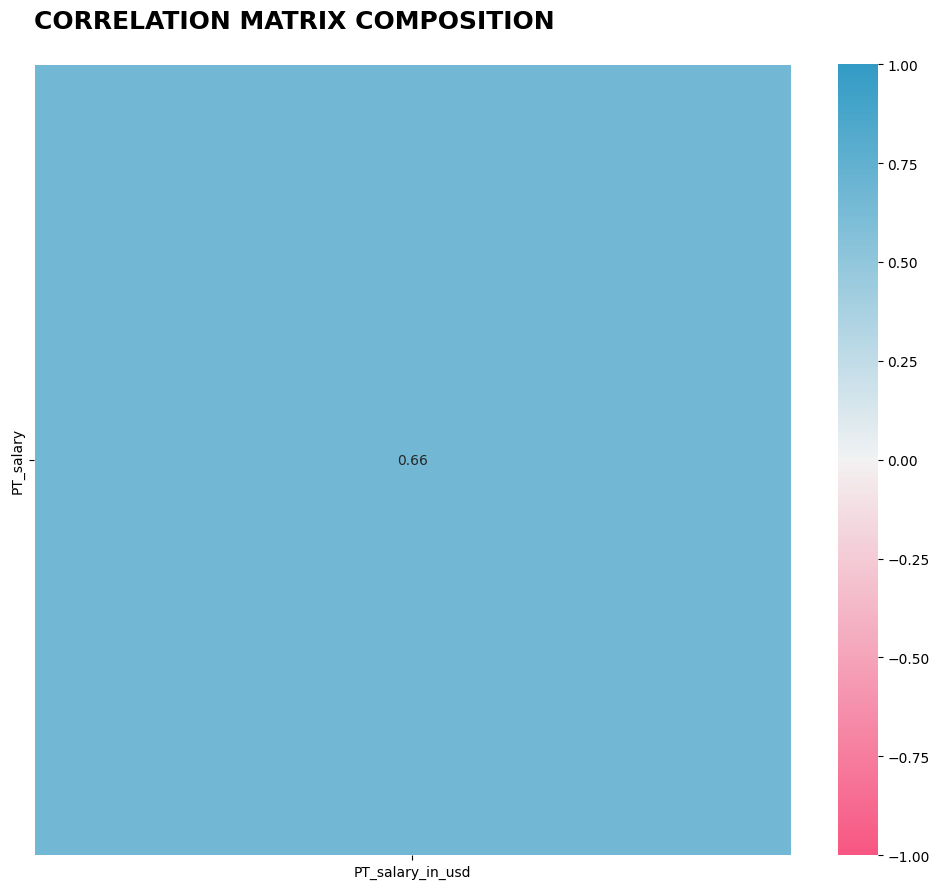

In [182]:
corr_matrix = processed_df.drop(columns=cat_features, axis=1).corr(numeric_only=True, method="spearman")
# one_like can build a matrix of boolean(True, False) with the same shape as our data
ones_corr = np.ones_like(corr_matrix, dtype=bool)
mask = np.triu(ones_corr)
adjusted_mask = mask[1:, :-1]
adjusted_cereal_corr = corr_matrix.iloc[1:, :-1]

fig, ax = plt.subplots(figsize = (10, 9))
# That method uses HUSL colors, so you need hue, saturation, and lightness. 
# I used hsluv.org to select the colors of this chart.
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

sns.heatmap(data=adjusted_cereal_corr, mask=adjusted_mask,
            annot=True, fmt=".2f", cmap=cmap,
            vmin=-1, vmax=1, linecolor="white", linewidths=0.5)

title = "CORRELATION MATRIX COMPOSITION\n"
ax.set_title(title, loc="left", fontsize=18, weight="bold")

plt.tight_layout()
plt.show()

After the **Yeo–Johnson + robust** transformation, the correlation **rises to \~0.45**. Why:

* **Reduced skew & stabilized variance:** the transformation “straightens” the heavy-right tail, making the relationship with `salary_in_usd` **more linear**, so Pearson correlation increases.
* **Lower outlier impact:** robust scaling + PT **dampen outliers**; Pearson is very sensitive to them.
* **Monotonic transform:** Yeo–Johnson is monotonic, so observation ranks are preserved, clarifying the relationship.

## Re-checking Outliers

In [131]:
checking_outlier(list_feature=num_features, df=processed_df, dataset_name="Data")

🔍 Data Checking outlier


,Feature,Outlier Count
0,PT_salary,51
1,PT_salary_in_usd,9


## Create Test Set

🔴 Suppose you chatted with experts who told you that the **experience_level** is a very important attribute to predict **PT_salary_in_usd**.

In [133]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(processed_df, processed_df["experience_level"]):
    start_train_set = processed_df.iloc[train_index]
    start_test_set = processed_df.iloc[test_index]

## Scale and Encode

In [135]:
df_salaries_new = start_train_set.drop("PT_salary_in_usd", axis=1)
df_salaries_label = start_train_set["PT_salary_in_usd"].copy()

list_feature_num_robust = ["PT_salary"]
list_feature_cat_onehot = ["remote_ratio", "work_year", "experience_level", "employment_type", "job_category",
                           "salary_currency_bin", "employee_residence_category", "company_loc_bin", "company_size"]

In [136]:
# There are no **missing values** in dataset. But we will still handle missing values ​​to check the data in the future.
num_robust_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", RobustScaler())
])

cat_onehot_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")), 
    ("encoder", OneHotEncoder(handle_unknown="ignore")) # Handling Text and Categorical Attributes
])

preprocessor = ColumnTransformer(transformers=[
    ("num_robust", num_robust_transformer, list_feature_num_robust),
    ("cat_onehot", cat_onehot_transformer, list_feature_cat_onehot)
])

preprocessor.fit(df_salaries_new)

ColumnTransformer(transformers=[('num_robust',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', RobustScaler())]),
                                 ['PT_salary']),
                                ('cat_onehot',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['remote_ratio', 'work_year',
                                  'experience_level', 'employment_type',
                                  'job_category', 'salary_currency_bin',
                                  'employee_residence_category',
                                  'company_loc_bin', 'company_size'])])

In [139]:
df_salaries_new_prepared = preprocessor.transform(df_salaries_new)
list_feature_prepared = preprocessor.get_feature_names_out().tolist()
list_feature_prepared

['num_robust__PT_salary',
 'cat_onehot__remote_ratio_0',
 'cat_onehot__remote_ratio_50',
 'cat_onehot__remote_ratio_100',
 'cat_onehot__work_year_2020',
 'cat_onehot__work_year_2021',
 'cat_onehot__work_year_2022',
 'cat_onehot__experience_level_EN',
 'cat_onehot__experience_level_EX',
 'cat_onehot__experience_level_MI',
 'cat_onehot__experience_level_SE',
 'cat_onehot__employment_type_CT',
 'cat_onehot__employment_type_FL',
 'cat_onehot__employment_type_FT',
 'cat_onehot__employment_type_PT',
 'cat_onehot__job_category_Analytics & Business Intelligence',
 'cat_onehot__job_category_Data Engineering & Architecture',
 'cat_onehot__job_category_Data Science & Research',
 'cat_onehot__job_category_Leadership & Management',
 'cat_onehot__salary_currency_bin_Other',
 'cat_onehot__salary_currency_bin_USD',
 'cat_onehot__employee_residence_category_Europe',
 'cat_onehot__employee_residence_category_North America',
 'cat_onehot__employee_residence_category_Other',
 'cat_onehot__company_loc_bin_

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Define Metric</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Define Metric
    </h1>
</div>

## **Coefficient of Determination (R²)**

**Definition:**

**R²** (Coefficient of Determination) measures the proportion of variance in the **actual target** that is **explained by the model’s predictions** relative to a baseline that always predicts the mean. It answers: *“How much better is my model than predicting the average every time?”*

**Formula:**

Let $y_i$ be actual values, $\hat{y}_i$ predictions, $\bar{y}$ the mean of $y$, and $n$ the number of observations.

$$
R^2 \;=\; 1 - \frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}
$$

* Numerator: **Residual Sum of Squares** (errors vs. predictions)
* Denominator: **Total Sum of Squares** (errors vs. mean)

**Characteristics:**

* Range: **$(-\infty, 1]$** — **1.0** = perfect fit; **0** = no better than mean; **negative** = worse than mean on the evaluation set.
* **Unitless** (scale-free) — comparable across models on the same target.
* Reflects **explained variance**, not the magnitude of error.
* Can **increase when adding features** even if they’re not useful → guard with **cross-validation/regularization** to prevent overfitting.
* Interpretation depends on the **scale of the target**: if the model was trained on $\log(y)$, R² pertains to the **log scale**.

**R² vs. Other Metrics (quick compare):**

* **R² vs. RMSE/MAE:**

  * R² is a *relative* goodness-of-fit vs. the mean baseline.
  * RMSE/MAE are *absolute* error metrics in target units (e.g., USD).
  * Report R² **together with** RMSE/MAE for a complete picture.

📎 **Important Notes:**

* **Negative R²** on held-out data indicates underperformance vs. the mean predictor.
* Works with any regression model (linear or nonlinear).
* When comparing models across datasets, prefer **cross-validated R²** to avoid optimistic bias.

**References:**

* Scikit-learn: [`r2_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)
* Wikipedia: [Coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination)

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Evaluation Using Cross-Validation</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Evaluation Using Cross-Validation
    </h1>
</div>

In [138]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.ensemble import (GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor,
                              HistGradientBoostingRegressor, BaggingRegressor)
from sklearn.svm import LinearSVR, SVR
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

seed = 42
max_iter = 50000
kfold = KFold(n_splits=5, shuffle=True, random_state=seed)

models = [
    LinearSVR(max_iter=max_iter, random_state=seed),
    SVR(kernel="rbf", max_iter=max_iter),
    CatBoostRegressor(random_seed=seed, verbose=False),
    LinearRegression(),
    Lasso(alpha=0.0005, max_iter=max_iter, random_state=seed),
    Ridge(alpha=15, max_iter=max_iter, random_state=seed),
    ElasticNet(alpha=0.1, max_iter=max_iter, random_state=seed),
    DecisionTreeRegressor(max_depth=5, random_state=seed),
    RandomForestRegressor(n_estimators=100, random_state=seed),
    GradientBoostingRegressor(random_state=seed),
    AdaBoostRegressor(random_state=seed),
    ExtraTreesRegressor(random_state=seed),
    MLPRegressor(max_iter=max_iter, random_state=seed),
    KNeighborsRegressor(n_neighbors=5),
    XGBRegressor(n_estimators=1000, max_depth=5, learning_rate=0.1, random_state=seed),
    LGBMRegressor(random_state=seed, verbosity=-1),
    HistGradientBoostingRegressor(random_state=seed, max_iter=max_iter),
    BaggingRegressor(random_state=seed)
]

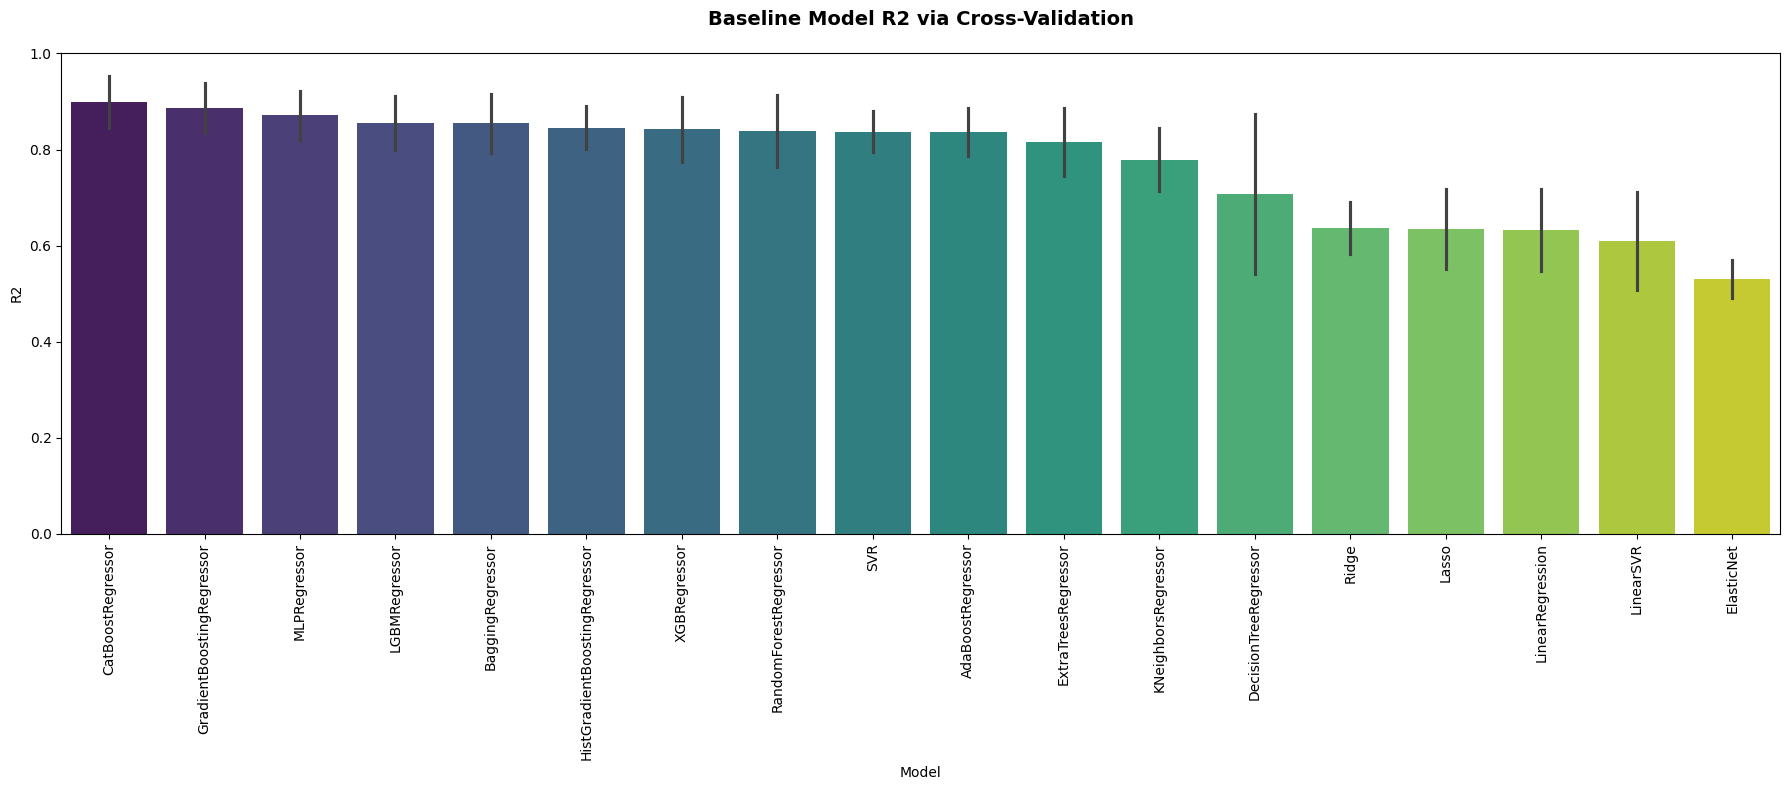

,Mean,Standard Deviation
model_name,,
CatBoostRegressor,0.899350,0.054439
GradientBoostingRegressor,0.885819,0.051977
MLPRegressor,0.871025,0.050244
LGBMRegressor,0.856222,0.056210
BaggingRegressor,0.854511,0.061496
HistGradientBoostingRegressor,0.845411,0.044189
XGBRegressor,0.842285,0.067499
RandomForestRegressor,0.837939,0.075126
SVR,0.837428,0.042857


In [141]:
def generate_baseline_results(models, X, y, metric="r2", cv=kfold,
                              plot_result=False, n_jobs=-1):
    entries = []

    # determine metric type
    is_loss = str(metric).startswith("neg_")  # loss: lower is better
    pretty_metric = metric.replace("neg_", "").upper()

    for model in models:
        model_name = model.__class__.__name__
        scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=n_jobs)

        # flip sign for loss metrics so we report positive values (RMSE/MAE/MSE…)
        scores_to_report = -scores if is_loss else scores

        for fold_idx, s in enumerate(scores_to_report, start=1):
            entries.append((model_name, fold_idx, float(s)))

    cv_df = pd.DataFrame(entries, columns=["model_name", "fold_id", "score"])

    # Summary
    summary = (cv_df.groupby("model_name")["score"]
                    .agg(["mean", "std"])
                    .rename(columns={"mean": "Mean", "std": "Standard Deviation"}))

    # Sort: for metrics, higher is better; for losses, lower is better
    summary = summary.sort_values("Mean", ascending=is_loss)

    if plot_result:
        plt.figure(figsize=(18, 8))
        sns.barplot(
            x="model_name", y="score", data=cv_df,
            order=summary.index, palette="viridis", estimator="mean", errorbar="sd"
        )
        plt.title(f"Baseline Model {pretty_metric} via Cross-Validation", fontsize=14, weight="bold", pad=20)
        ylabel = pretty_metric  # already flipped for losses above
        plt.xlabel("Model")
        plt.ylabel(ylabel)
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()

    return summary

generate_baseline_results(models=models, X=df_salaries_new_prepared, y=df_salaries_label, plot_result=True)

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Hyperparameter tuning</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Hyperparameter tuning
    </h1>
</div>

In [142]:
def shap_plot(model, X_test, list_feature, type = None):    
     # https://towardsdatascience.com/using-shap-values-to-explain-how-your-machine-learning-model-works-732b3f40e137/
    if hasattr(X_test, "toarray"):
        X_test = X_test.toarray()
    X_test_sample = pd.DataFrame(X_test, columns=list_feature)
    explainer = shap.Explainer(model.predict, X_test_sample)
    shap_values = explainer(X_test_sample)
    if type =="bar":
        shap_importance = np.abs(shap_values.values).mean(axis=0)
        shap_df = pd.DataFrame({"feature": X_test_sample.columns, "importance": shap_importance})
        shap_df = shap_df.sort_values("importance", ascending=False).head(20)
        plt.figure(figsize=(12, 6))
        sns.barplot(x=shap_df["importance"], y=shap_df["feature"], palette="viridis", order=shap_df["feature"])
        plt.xlabel("mean(|SHAP value|)")
        plt.title("SHAP Feature Importance")
        plt.tight_layout()
        plt.show()
    else:
        shap.summary_plot(shap_values, X_test_sample)

In [151]:
from sklearn.metrics import r2_score

# Function to evaluate regression models
def evaluate_model(model, X_train, X_val, y_train, y_val, pt=None, show_shap_plot = True):
    RESET = "\033[0m"
    BLUE = "\033[94m"
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    # Back-transform predictions and ground truth
    if pt is not None:
        y_val_real = pt.inverse_transform(y_val.values.reshape(-1, 1)).flatten()
        y_pred_real = pt.inverse_transform(y_pred.reshape(-1, 1)).flatten()
    else:
        y_val_real = y_val
        y_pred_real = y_pred
    
    # Metrics: R2
    r2 = r2_score(y_val_real, y_pred_real)
    print(f"Model: {model.__class__.__name__}{RESET}")
    print(f"Coefficient of Determination (R2): {BLUE}{r2:.4f}{RESET}")
    print("-" * 80)

    fig, axs = plt.subplots(1, 2, figsize=(14, 7))

    # ----- Plot 1: Predicted vs. Actual -----
    axs[0].scatter(y_val_real, y_pred_real, alpha=0.4, color="royalblue")
    axs[0].plot(
        [y_val_real.min(), y_val_real.max()],
        [y_val_real.min(), y_val_real.max()],
        "r--", lw=2, label="Perfect Prediction (y=x)"
    )
    axs[0].set_xlabel("Actual Values (price)")
    axs[0].set_ylabel("Predicted Values (price)")
    axs[0].set_title("Predicted vs. Actual (Validation Set)", weight = "bold", pad=20)
    axs[0].legend()
    axs[0].grid(True, alpha=0.2)

    # ----- Plot 2: Residual Plot -----
    residuals = y_val_real - y_pred_real
    axs[1].scatter(y_val_real, residuals, alpha=0.5)
    axs[1].axhline(0, color="red", linestyle="--", lw=2)
    axs[1].set_xlabel("Actual Values (price)")
    axs[1].set_ylabel("Prediction Error (Residuals)")
    axs[1].set_title("Residual Plot", weight = "bold", pad=20)
    axs[1].grid(True, alpha=0.2)

    # Tối ưu bố cục
    plt.tight_layout()
    plt.show() 

    if show_shap_plot:
        shap_plot(model = model, X_test = X_val, list_feature = list_feature_prepared)

    return r2

In [144]:
X_val = start_test_set.drop("PT_salary_in_usd", axis=1)
y_val = start_test_set["PT_salary_in_usd"].copy()
X_val_prepared = preprocessor.transform(X_val)

## CatBoostRegressor

In [149]:
param_cb = {
"bootstrap_type": "MVS", 
"iterations": 2222, 
"depth": 7, 
"learning_rate": 0.02910070350549848, 
"l2_leaf_reg": 3.9680655495966297,
"random_strength": 0.1669108925411012, 
"rsm": 0.9051405893879342, 
"subsample": 0.796091354633973,
"random_seed": 42,
"verbose": False,
"loss_function": "RMSE", 
"eval_metric": "R2"
}

model_cb = CatBoostRegressor(**param_cb)
model_cb

Model: CatBoostRegressor
Coefficient of Determination (R2): 0.9357
--------------------------------------------------------------------------------


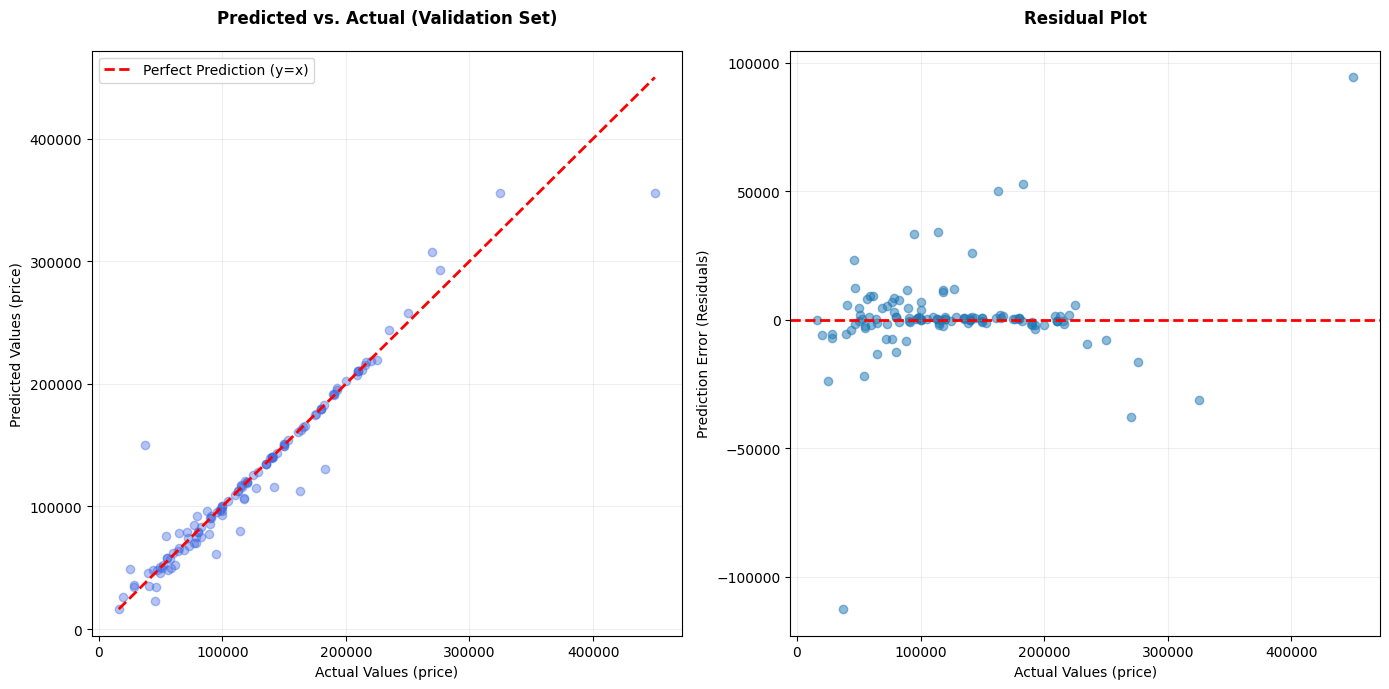

In [152]:
weight_r2_cb = evaluate_model(model = model_cb, X_train = df_salaries_new_prepared, 
                   X_val = X_val_prepared , y_train = df_salaries_label, y_val=y_val, pt = pt_dict_train["salary_in_usd"], show_shap_plot = False)

## GradientBoostingRegressor

In [155]:
param_gbr = {
"loss": "absolute_error", 
"n_estimators": 978, 
"learning_rate": 0.11861283165977808, 
"subsample": 0.7584928588330313, 
"max_depth": 4, 
"min_samples_split": 4, 
"min_samples_leaf": 1, 
"max_features": None, 
"criterion": "squared_error", 
"validation_fraction": 0.14877121579683036, 
"n_iter_no_change": 27, 
"tol": 0.00010110050248964968,
"random_state": seed,
}

model_gbr = GradientBoostingRegressor(**param_gbr)
model_gbr

GradientBoostingRegressor(criterion='squared_error',
                          learning_rate=0.11861283165977808,
                          loss='absolute_error', max_depth=4,
                          min_samples_split=4, n_estimators=978,
                          n_iter_no_change=27, random_state=42,
                          subsample=0.7584928588330313,
                          tol=0.00010110050248964968,
                          validation_fraction=0.14877121579683036)

Model: GradientBoostingRegressor
Coefficient of Determination (R2): 0.9492
--------------------------------------------------------------------------------


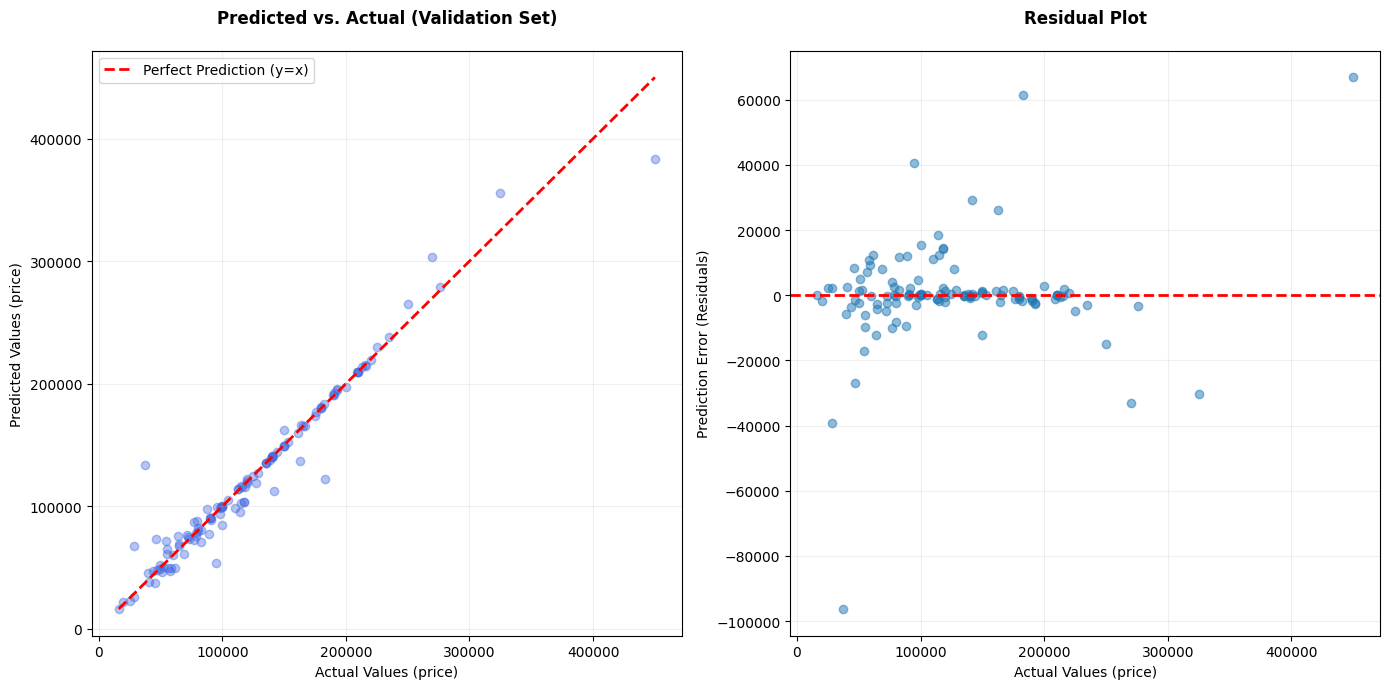

In [156]:
weight_r2_gbr = evaluate_model(model = model_gbr, X_train = df_salaries_new_prepared, 
                   X_val = X_val_prepared , y_train = df_salaries_label, y_val=y_val, pt = pt_dict_train["salary_in_usd"], show_shap_plot = False)

## MLPRegressor

In [ ]:
param_mlp= {
"solver": "adam", 
"activation": "tanh", 
"alpha": 4.378581712392515e-05, 
"learning_rate_init": 0.008336755439361358, 
"tol": 0.0004335412345865282, 
"validation_fraction": 0.100441289437308, 
"n_iter_no_change": 39, 
"batch_size": 64, 
"beta_1": 0.8721122953524123, 
"beta_2": 0.9004784069896675, 
"epsilon": 1.4927988112795377e-09,
"random_state":seed,
"max_iter": max_iter
}

model_mlp = MLPRegressor(**param_mlp)
model_mlp

MLPRegressor(activation='tanh', alpha=4.378581712392515e-05, batch_size=64,
             beta_1=0.8721122953524123, beta_2=0.9004784069896675,
             epsilon=1.4927988112795377e-09,
             learning_rate_init=0.008336755439361358, max_iter=50000,
             n_iter_no_change=39, random_state=42, tol=0.0004335412345865282,
             validation_fraction=0.100441289437308)

Model: MLPRegressor
Coefficient of Determination (R2): 0.9197
--------------------------------------------------------------------------------


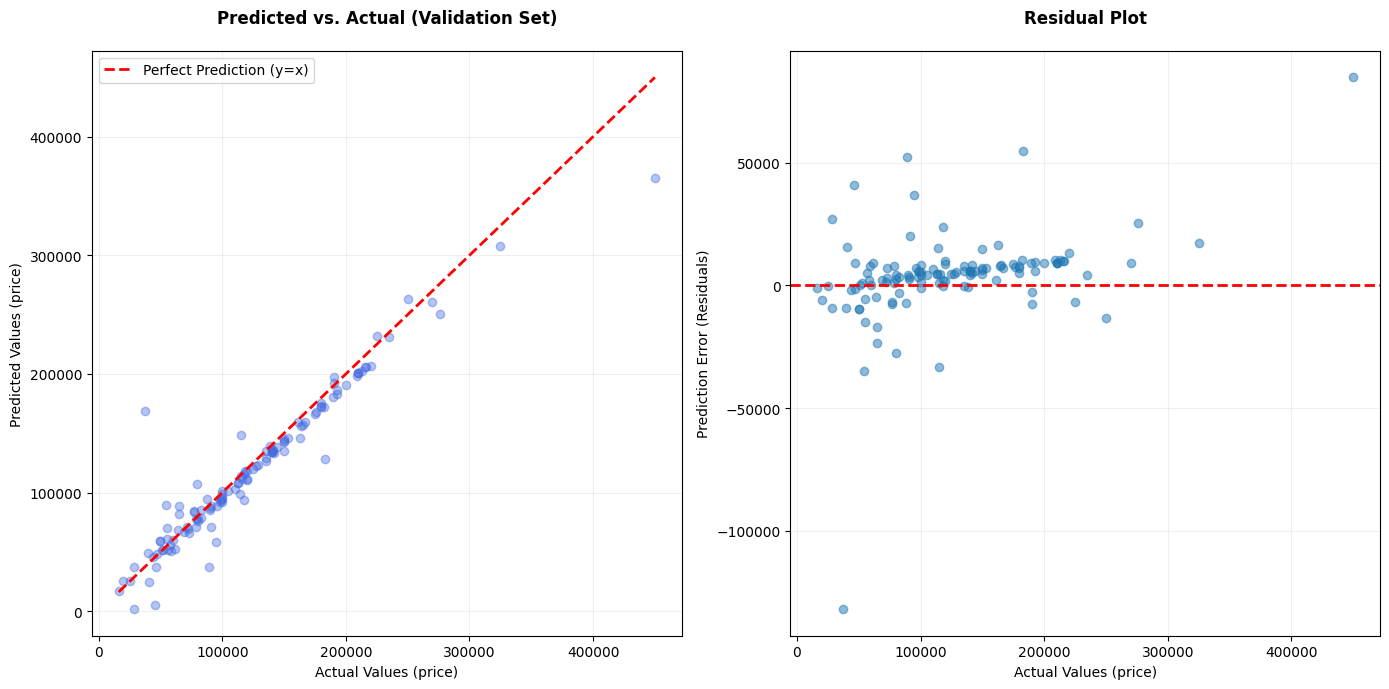

In [167]:
weight_r2_mlp = evaluate_model(model = model_mlp, X_train = df_salaries_new_prepared, 
                   X_val = X_val_prepared , y_train = df_salaries_label, y_val=y_val, pt = pt_dict_train["salary_in_usd"], show_shap_plot = False)

## LGBMRegressor

In [170]:
param_lgbm= {
    "n_estimators": 426, 
    "learning_rate": 0.07480652896767274, 
    "num_leaves": 116, 
    "max_depth": 3, 
    "min_child_samples": 5, 
    "subsample": 0.8829852764398515, 
    "colsample_bytree": 0.7847841525747441, 
    "reg_lambda": 2.0620159158588094, 
    "reg_alpha": 0.0010718733099238885, 
    "min_split_gain": 0.00022073968366863891, 
    "max_bin": 342,
    "random_state": 42,
    "force_col_wise": True,
    "verbosity": -1,
    "objective": "regression",
    "metric": "rmse"
}

model_lgbm = LGBMRegressor(**param_lgbm)
model_lgbm

LGBMRegressor(colsample_bytree=0.7847841525747441, force_col_wise=True,
              learning_rate=0.07480652896767274, max_bin=342, max_depth=3,
              metric='rmse', min_child_samples=5,
              min_split_gain=0.00022073968366863891, n_estimators=426,
              num_leaves=116, objective='regression', random_state=42,
              reg_alpha=0.0010718733099238885, reg_lambda=2.0620159158588094,
              subsample=0.8829852764398515, verbosity=-1)

Model: LGBMRegressor
Coefficient of Determination (R2): 0.9409
--------------------------------------------------------------------------------


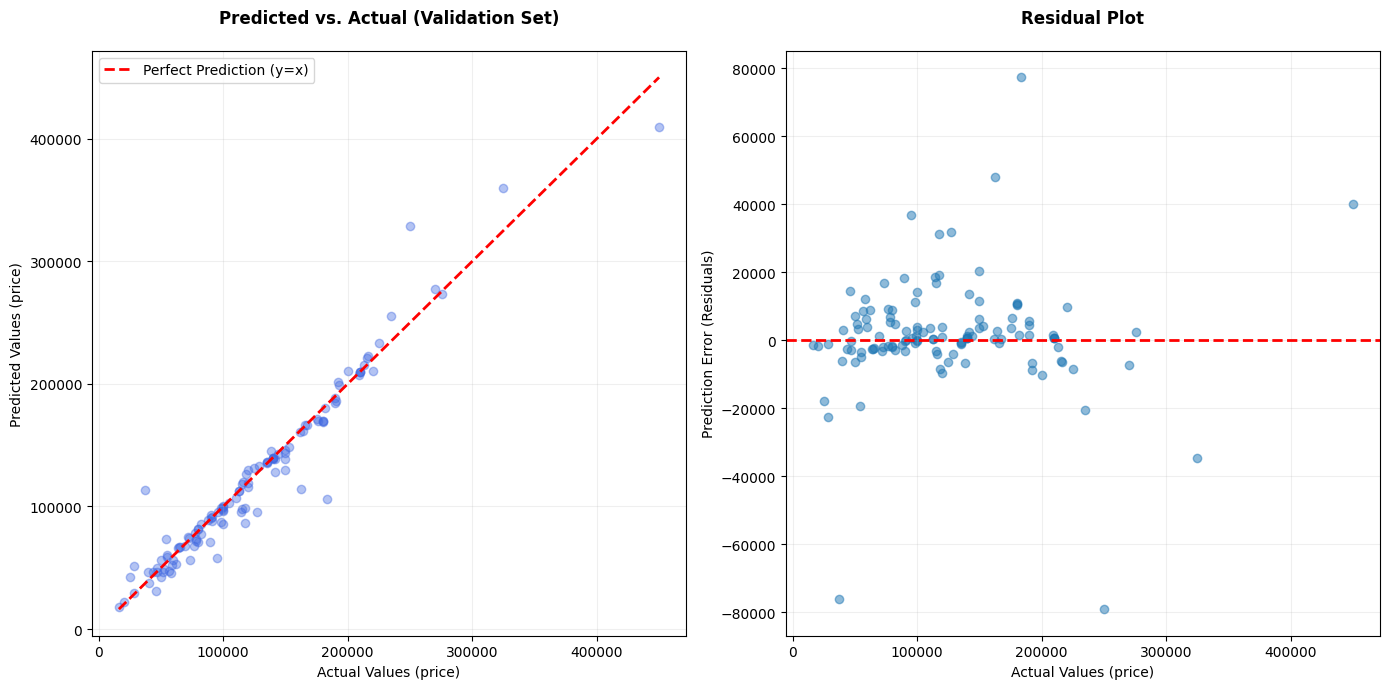

In [171]:
weight_r2_lgbm = evaluate_model(model = model_lgbm, X_train = df_salaries_new_prepared, 
                   X_val = X_val_prepared , y_train = df_salaries_label, y_val=y_val, pt = pt_dict_train["salary_in_usd"], show_shap_plot = False)

## HistGradientBoostingRegressor

In [174]:
param_hgbr= {
    "loss": "absolute_error", 
    "early_stopping": False, 
    "learning_rate": 0.014484236626384893, 
    "max_iter": 2800, 
    "max_leaf_nodes": 54,
    "max_depth": 8, 
    "min_samples_leaf": 8, 
    "l2_regularization": 0.001645357375224131, 
    "max_bins": 184, 
    "tol": 0.00308615930770772,
    "random_state": 42,
    "verbose": 0
}

model_hgbr = HistGradientBoostingRegressor(**param_hgbr)
model_hgbr

HistGradientBoostingRegressor(early_stopping=False,
                              l2_regularization=0.001645357375224131,
                              learning_rate=0.014484236626384893,
                              loss='absolute_error', max_bins=184, max_depth=8,
                              max_iter=2800, max_leaf_nodes=54,
                              min_samples_leaf=8, random_state=42,
                              tol=0.00308615930770772)

Model: HistGradientBoostingRegressor
Coefficient of Determination (R2): 0.9492
--------------------------------------------------------------------------------


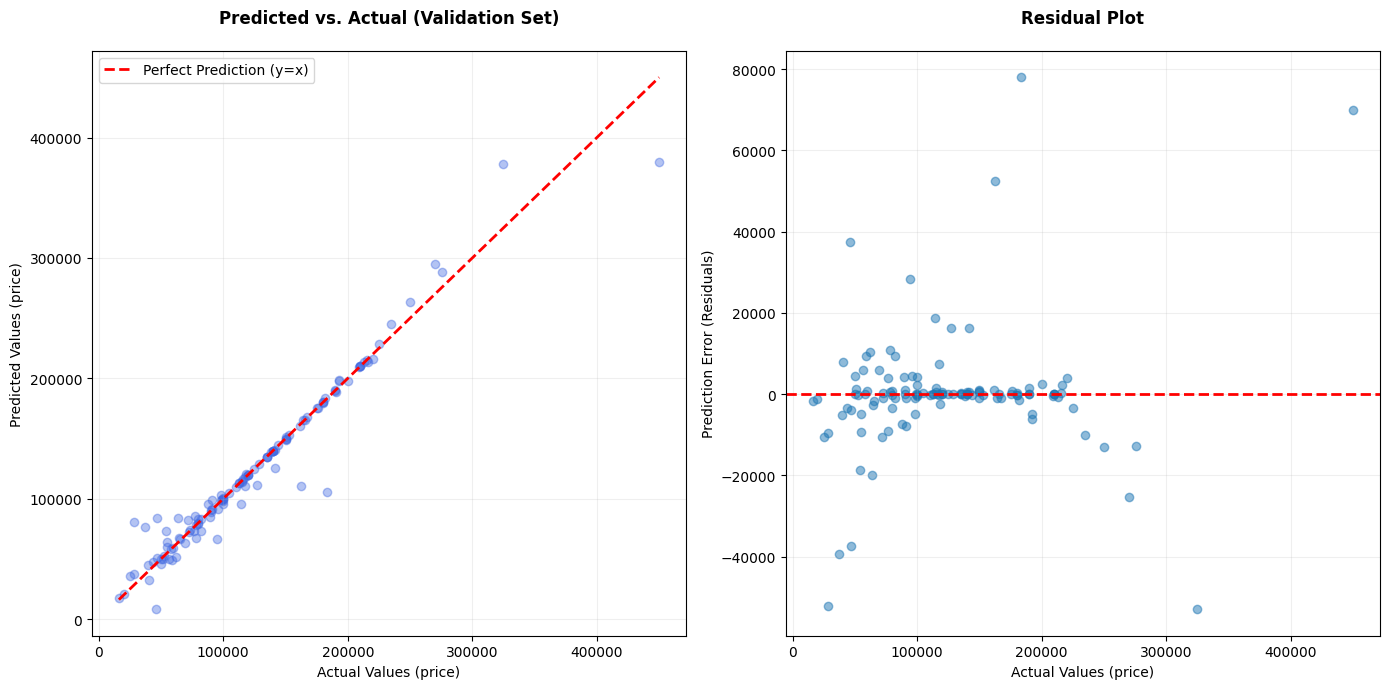

In [175]:
weight_r2_hgbr = evaluate_model(model = model_hgbr, X_train = df_salaries_new_prepared, 
                   X_val = X_val_prepared , y_train = df_salaries_label, y_val=y_val, pt = pt_dict_train["salary_in_usd"], show_shap_plot = False)

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Conclusion</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Conclusion
    </h1>
</div>


## VotingClassifier

In [176]:
from sklearn.ensemble import VotingRegressor

voting_reg = VotingRegressor(estimators=[
    ("cb", model_cb),
    ("gbr", model_gbr),
    ("mlp", model_mlp),
    ("lgbm", model_lgbm),
    ("hgbr", model_hgbr),
], n_jobs=1, weights=[weight_r2_cb, weight_r2_gbr, weight_r2_mlp, weight_r2_lgbm, weight_r2_hgbr])

cv_scores = cross_val_score(
    voting_reg,
    X=df_salaries_new_prepared,
    y=df_salaries_label,
    cv=kfold,
    scoring="r2",
    n_jobs=-1
)

mean_score = cv_scores.mean()
std_score = cv_scores.std()

print(f"Cross-validated R2 (mean ± std): {mean_score:.4f} ± {std_score:.4f}")

Cross-validated R2 (mean ± std): 0.9201 ± 0.0402


Model: VotingRegressor
Coefficient of Determination (R2): 0.9532
--------------------------------------------------------------------------------


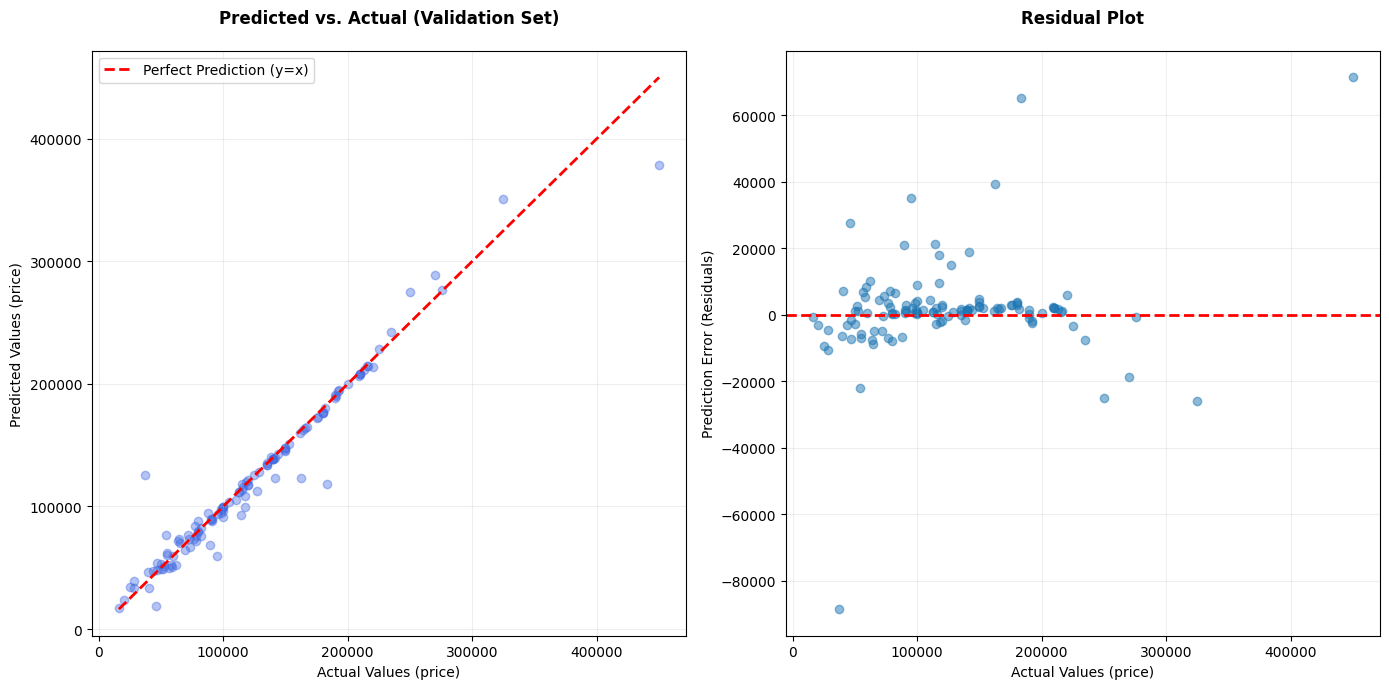

PermutationExplainer explainer: 123it [02:55,  1.47s/it]                         


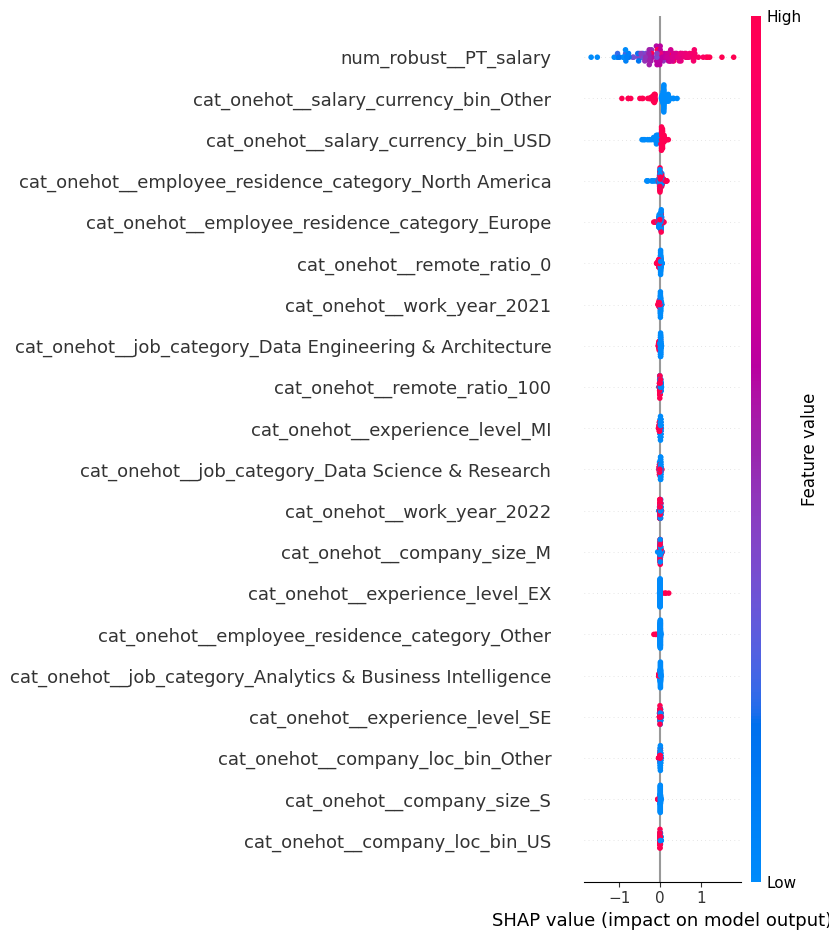

In [178]:
weight_r2_vc = evaluate_model(model = voting_reg, X_train = df_salaries_new_prepared, 
                   X_val = X_val_prepared , y_train = df_salaries_label, y_val=y_val, pt = pt_dict_train["salary_in_usd"], show_shap_plot = True)

PermutationExplainer explainer: 123it [02:50,  1.48s/it]                         


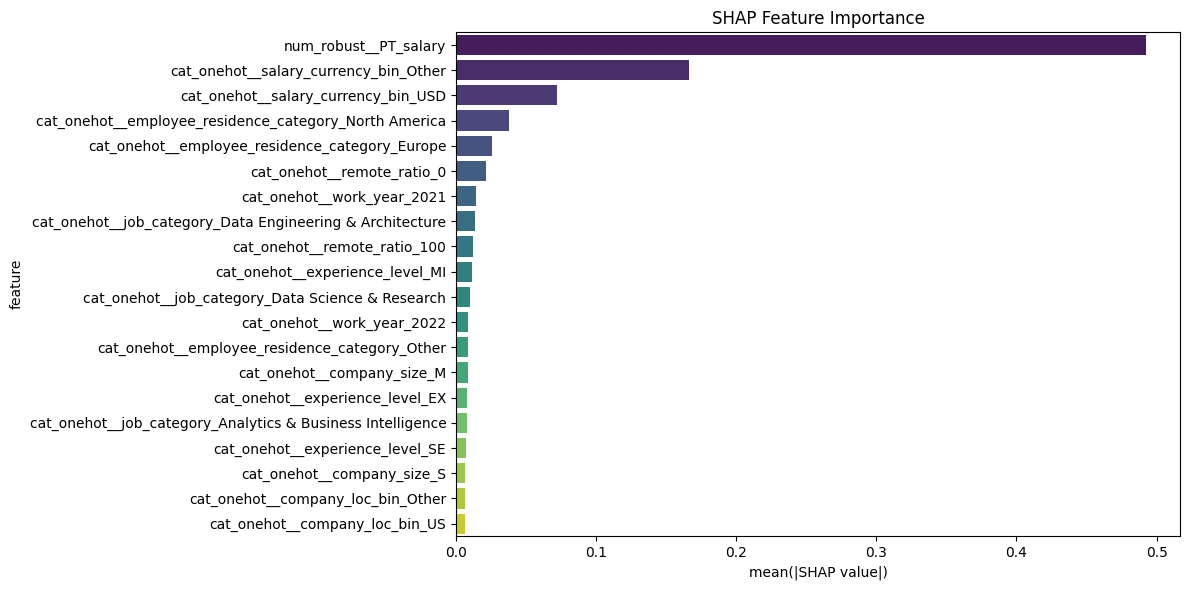

In [179]:
shap_sample = X_val_prepared.iloc[:122] if isinstance(X_val_prepared, pd.DataFrame) else X_val_prepared[:122]
shap_plot(model=voting_reg, X_test=shap_sample, list_feature=list_feature_prepared, type="bar")

**Overview of SHAP Feature Importance**

**Most Important Feature**

* **`num_robust__PT_salary`** dominates with a **mean(|SHAP value|) close to 0.5**.
  → This indicates that the original salary variable (after robust transformation) is the most important factor in the model, with the strongest influence on predictions.

**Second-Tier Features**

* **`cat_onehot__salary_currency_bin_Other`** and **`cat_onehot__salary_currency_bin_USD`**: moderate impact (\~0.1–0.2), highlighting the significance of salary currency when converted to USD.
* Thus, **currency type** is also an important factor, though not as strong as the salary value itself.

**Location & Region Features**

* **`cat_onehot__employee_residence_category_North America`** and **Europe** contribute meaningfully.
  → This shows that geographic region has an influence on salary levels, but only as a secondary driver.

**Other Features (Smaller Impact)**

* Variables like **remote ratio**, **work year**, **job category**, **experience level**, and **company size** have an impact, but relatively minor.
  → They help refine the model, but are not the main decision drivers.

**Overall Conclusion**

* **Base salary (`PT_salary`)** is the key driver of the predictions.
* **Currency and geographic region** play important secondary roles.
* Other contextual features (year, job category, remote ratio, company size) act as supporting factors, improving accuracy in specific cases.

**In short**: the model relies primarily on **salary amount and currency**, with contextual information (region, company, job type, year) used for fine-tuning.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        🙏 Thanks for Reading! 🚀
    </h1>
    <p style="color: #ffffff; font-size: 18px; text-align: center;">
        Happy Coding! 🙌😊
    </p>
</div>
